In [2]:
# This dataset was created from the RAVDESS dataset 
# (https://es.sonicurlprotectionfra.com/click?PV=2&MSGID=202209141411100289250&URLID=1&ESV=10.0.18.7423&IV=CDD893A9D96AB6D6469DFBAF03B52C7A&TT=1663164671774&ESN=SJ44mpH7HPEgdwadIHqGKE9aHAKB%2FGfCfiESv9Jnnj4%3D&KV=1536961729280&B64_ENCODED_URL=aHR0cHM6Ly96ZW5vZG8ub3JnL3JlY29yZC8xMTg4OTc2KSw&HK=3428F8A9C48043894424396B826370722E127A5AEC482B778236DC3B3D0A300B 

# extracting basic statistics (mean, std, min, max, etc.) from the original audio data and after transforming it using: zero-crossing rate, Mel-Frequency Cepstral Coefficients, spectral centroid, and the stft chromagram. 

# Features were extracted from the 2452 wav files.

# Main Features:
# •	modality (audio-only)
# •	vocal_channel (speech, song)
# •	emotion (neutral, calm, happy, sad, angry, fearful, disgust, surprised)
# •	emotional_intensity (normal, strong). NOTE: There is no strong intensity for the 'neutral' emotion
# •	statement ("Kids are talking by the door", "Dogs are sitting by the door")
# •	repetition (1st repetition, 2nd repetition)
# •	actor (01 to 24)
# •	sex (M, F)
# •	channels (number of channels; 1 for mono, 2 for stereo audio)
# •	sample_width (number of bytes per sample; 1 means 8-bit, 2 means 16-bit)
# •	frame_rate (frequency of samples used (in Hertz))
# •	frame_width (Number of bytes for each âframeâ. One frame contains a sample for each channel.)
# •	length_ms (audio file length (in milliseconds))
# •	frame_count (the number of frames from the sample)
# •	intensity (loudness in dBFS (dB relative to the maximum possible loudness))

# Features Extracted:
# Skew: Skewness is a measure of symmetry, or more precisely, the lack of symmetry. 
#           A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

# Kur: Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.That is, data sets with high kurtosis tend to have heavy tails, or outliers. 
# Data sets with low kurtosis tend to have light tails, or lack of outliers.
# In other words, tails represent how often outliers occur.

# •	(sum of the zero-crossing rate): zero_crossings_sum (sum of the zero-crossing rate)
# The zero-crossing rate is the rate at which a signal changes from positive to zero to negative or from negative to zero to positive.

# •	(statistics of the original audio signal): 'mean', 'std', 'min', 'max', 'kur', 'skew' 

# •	(statistics of the Mel-Frequency Cepstral Coefficients) : mfcc_ 'mean', 'std', 'min', 'max' 
# Mel Frequency Cepstral Coefficents (MFCCs or MFCC) are a feature widely used in automatic speech and speaker recognition.

# •	(statistics of the spectral centroid) : sc_ 'mean', 'std', 'min', 'max', 'kur', 'skew' 
# A sound spectrum is a representation of a sound – usually a short sample of a sound – in terms of the amount of vibration at each individual frequency. The center of gravity of the spectrum.

# •	(statistics of the stft chromagram) : stft_ 'mean', 'std', 'min', 'max', 'kur', 'skew'
#  A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).


## Data understanding

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [4]:
# Importing Dataset
#df = pd.read_csv("ravdess_features.csv")
df = pd.read_csv("/Users/vincenzorocchi/Desktop/DataMining_project_RAVDESS/Ravdess/ravdess_features.csv")

In [5]:
df.head()

modality vocal_channel    emotion emotional_intensity  \
0  audio-only        speech    fearful              normal   
1  audio-only        speech      angry              normal   
2  audio-only           NaN      happy              strong   
3  audio-only           NaN  surprised              normal   
4  audio-only          song      happy              strong   

                      statement repetition  actor sex  channels  sample_width  \
0  Dogs are sitting by the door        2nd    2.0   F         1             2   
1  Dogs are sitting by the door        1st   16.0   F         1             2   
2  Dogs are sitting by the door        2nd   16.0   F         1             2   
3  Kids are talking by the door        1st   14.0   F         1             2   
4  Dogs are sitting by the door        2nd    2.0   F         1             2   

   ...  stft_min  stft_max  stft_kur  stft_skew          mean       std  \
0  ...       0.0       1.0 -1.215025   0.403514  3.844916e-07  0.014482   
1  ...       0.0       1.0 -1.384174   0.290905 -7.149491e-08  0.020417   
2  ...       0.0       1.0 -1.242947   0.470350  2.429985e-06  0.024317   
3  ...       0.0       1.0 -1.445318   0.274756  2.373929e-07  0.003561   
4  ...       0.0       1.0 -1.366742   0.318926  8.454691e-07  0.027522   

        min       max        kur      skew  
0 -0.128632  0.138947   9.406061  0.273153  
1 -0.305725  0.263062  19.564187  0.292157  
2 -0.137482  0.166351   4.881241  0.302659  
3 -0.027374  0.024078  13.040259 -0.081014  
4 -0.192169  0.242676   7.485109  0.414872  

[5 rows x 38 columns]

In [6]:
# df11 = df.drop(df.columns[[1, 7, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]], axis=1, inplace=True)
# df11.tail(100)

In [7]:
# # Skew and kurtosis before removing missing values and outliers.
# a = df.replace({"vocal_channel": vocal_channel_map})
# print("skew with outliers: {}".format(a['vocal_channel'].astype(float).skew()))
# print("kurtosis with outliers: {}".format(a['vocal_channel'].astype(float).kurt()))

In [8]:
cols = [col for col in df.columns if col!="class"]
cols

['modality',
 'vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'actor',
 'sex',
 'channels',
 'sample_width',
 'frame_rate',
 'frame_width',
 'length_ms',
 'frame_count',
 'intensity',
 'zero_crossings_sum',
 'mfcc_mean',
 'mfcc_std',
 'mfcc_min',
 'mfcc_max',
 'sc_mean',
 'sc_std',
 'sc_min',
 'sc_max',
 'sc_kur',
 'sc_skew',
 'stft_mean',
 'stft_std',
 'stft_min',
 'stft_max',
 'stft_kur',
 'stft_skew',
 'mean',
 'std',
 'min',
 'max',
 'kur',
 'skew']

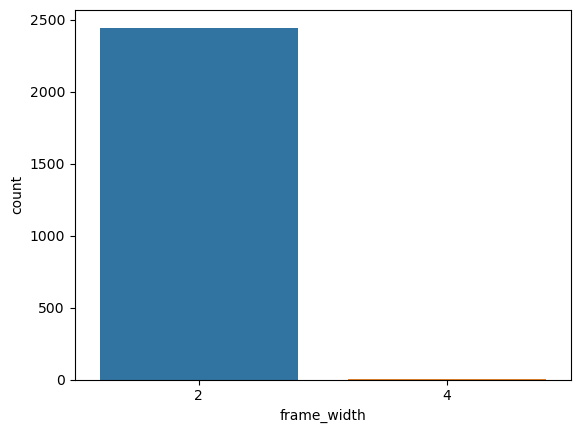

2    2446
4       6
Name: frame_width, dtype: int64

In [9]:
df["frame_width"].unique()
sns.countplot(data=df, x="frame_width", dodge=False)
plt.show()
df["frame_width"].value_counts()

In [10]:
df["repetition"].value_counts()

2nd    1226
1st    1226
Name: repetition, dtype: int64

In [11]:
# As the unique values of frame-width (2, 4). Out of which only .24% of data has value 4 and rest 99.76% data has value 2.
# So, we are dropping "frame width" column.

df.drop(columns="frame_width",axis=1, inplace=True)

1    2446
2       6
Name: channels, dtype: int64
[1 2]


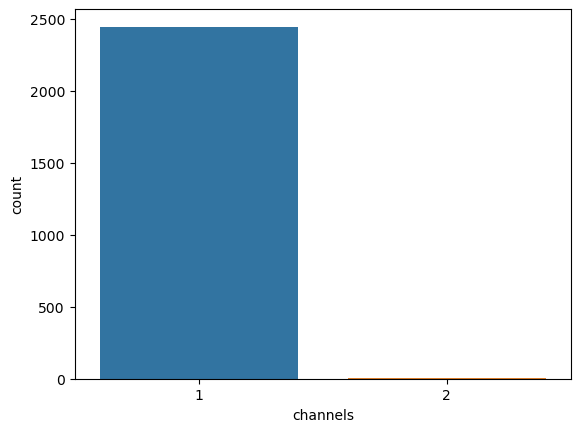

In [12]:
print(df["channels"].value_counts())
print(df["channels"].unique())
sns.countplot(data=df, x="channels", dodge=False)
plt.show()

In [13]:
# As the unique values of frame-width (2, 4). Out of which only .24% of data has value 4 and rest 99.76% data has value 2.
# So, we are dropping "frame width" column.

df.drop(columns="channels",axis=1, inplace=True)

In [14]:
df["zero_crossings_sum"]

0       16995
1       13906
2       18723
3       11617
4       15137
        ...  
2447     9871
2448     8963
2449     9765
2450     9716
2451     9427
Name: zero_crossings_sum, Length: 2452, dtype: int64

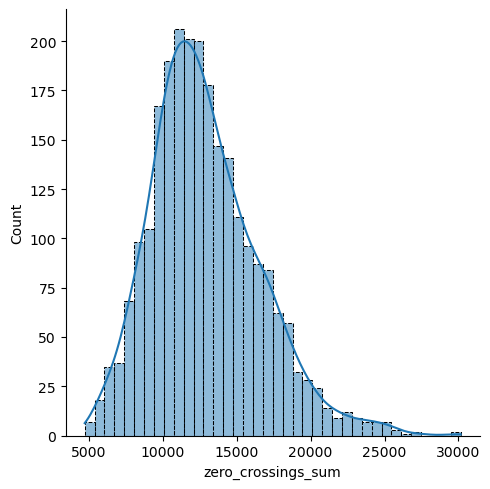

In [15]:
sns.displot(data=df,x='zero_crossings_sum',kde=True,edgecolor='black',lw=4,ls='--')

In [16]:
df["skew"]

0       0.273153
1       0.292157
2       0.302659
3      -0.081014
4       0.414872
          ...   
2447    0.759247
2448    1.073633
2449   -0.005821
2450   -0.110966
2451    1.032081
Name: skew, Length: 2452, dtype: float64

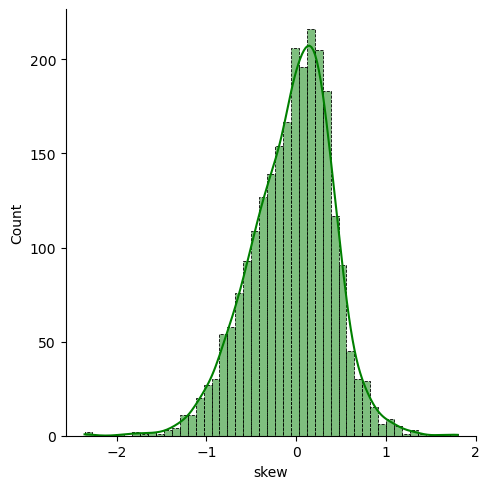

In [17]:
sns.set_palette("bright")
sns.displot(data=df,x='skew',kde=True,color = "green", edgecolor='black',lw=4,ls='--')

In [18]:
df[["intensity", "vocal_channel", "emotional_intensity", "emotion", "statement"]]

intensity vocal_channel emotional_intensity    emotion  \
0    -36.793432        speech              normal    fearful   
1           NaN        speech              normal      angry   
2    -32.290737           NaN              strong      happy   
3    -49.019839           NaN              normal  surprised   
4    -31.214503          song              strong      happy   
...         ...           ...                 ...        ...   
2447        NaN        speech              strong       calm   
2448 -43.342901        speech              normal       calm   
2449        NaN          song              strong        sad   
2450 -45.751265        speech              normal  surprised   
2451 -40.018044           NaN              normal    neutral   

                         statement  
0     Dogs are sitting by the door  
1     Dogs are sitting by the door  
2     Dogs are sitting by the door  
3     Kids are talking by the door  
4     Dogs are sitting by the door  
...                            ...  
2447  Kids are talking by the door  
2448  Dogs are sitting by the door  
2449  Dogs are sitting by the door  
2450  Kids are talking by the door  
2451  Dogs are sitting by the door  

[2452 rows x 5 columns]

In [19]:
# Getting Information about Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   modality             2452 non-null   object 
 1   vocal_channel        2256 non-null   object 
 2   emotion              2452 non-null   object 
 3   emotional_intensity  2452 non-null   object 
 4   statement            2452 non-null   object 
 5   repetition           2452 non-null   object 
 6   actor                1326 non-null   float64
 7   sex                  2452 non-null   object 
 8   sample_width         2452 non-null   int64  
 9   frame_rate           2452 non-null   int64  
 10  length_ms            2452 non-null   int64  
 11  frame_count          2452 non-null   float64
 12  intensity            1636 non-null   float64
 13  zero_crossings_sum   2452 non-null   int64  
 14  mfcc_mean            2452 non-null   float64
 15  mfcc_std             2452 non-null   f

In [20]:
# Getting total length of the Data Set
df.index

RangeIndex(start=0, stop=2452, step=1)

In [21]:
# Basic Statistical Data about the attributes
df.describe()

actor  sample_width  frame_rate    length_ms    frame_count  \
count  1326.000000        2452.0      2452.0  2452.000000    2452.000000   
mean     12.582202           2.0     48000.0  4092.151305  193587.188010   
std       6.916240           0.0         0.0   598.321526   36825.369056   
min       1.000000           2.0     48000.0  2936.000000      -1.000000   
25%       7.000000           2.0     48000.0  3604.000000  172972.000000   
50%      13.000000           2.0     48000.0  4004.000000  190591.000000   
75%      19.000000           2.0     48000.0  4538.000000  217817.000000   
max      24.000000           2.0     48000.0  6373.000000  305906.000000   

         intensity  zero_crossings_sum    mfcc_mean     mfcc_std     mfcc_min  \
count  1636.000000         2452.000000  2452.000000  2452.000000  2452.000000   
mean    -37.625332        12885.314029   -28.769180   136.777233  -758.909381   
std       8.451982         3665.319584     4.461886    20.451689    99.945452   
min     -63.864613         4721.000000   -43.812923    83.621370 -1085.479700   
25%     -43.539869        10362.500000   -31.828597   122.623928  -826.464075   
50%     -37.072745        12383.500000   -28.681109   136.523810  -760.983065   
75%     -31.591309        14966.000000   -25.550238   151.385135  -692.890015   
max     -16.353953        30153.000000   -15.491450   195.942920  -461.489320   

       ...     stft_min  stft_max     stft_kur    stft_skew          mean  \
count  ...  2452.000000    2452.0  2452.000000  2452.000000  2.452000e+03   
mean   ...     0.002272       1.0    -1.247929     0.112889  1.393649e-08   
std    ...     0.004830       0.0     0.211781     0.330759  4.267587e-05   
min    ...     0.000000       1.0    -1.669603    -0.993957 -9.435575e-04   
25%    ...     0.000000       1.0    -1.390612    -0.094334 -1.394488e-06   
50%    ...     0.000190       1.0    -1.292105     0.126065 -9.810701e-08   
75%    ...     0.001999       1.0    -1.152519     0.335574  8.363511e-07   
max    ...     0.039378       1.0     0.794669     1.465815  1.222810e-03   

               std          min          max          kur         skew  
count  2452.000000  2452.000000  2452.000000  2452.000000  2452.000000  
mean      0.020504    -0.164871     0.179839    11.203002    -0.048245  
std       0.021024     0.175443     0.195539     6.614859     0.454925  
min       0.000652    -0.998810     0.004669     1.757794    -2.356526  
25%       0.006791    -0.202431     0.055489     6.519988    -0.336624  
50%       0.013880    -0.103775     0.109726     9.828686     0.004256  
75%       0.026154    -0.054352     0.224487    14.085435     0.262978  
max       0.152168    -0.006134     0.999146    59.085695     1.799676  

[8 rows x 29 columns]

In [22]:
# Getting total columns
all_cols = list(df.columns)
all_cols

['modality',
 'vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'actor',
 'sex',
 'sample_width',
 'frame_rate',
 'length_ms',
 'frame_count',
 'intensity',
 'zero_crossings_sum',
 'mfcc_mean',
 'mfcc_std',
 'mfcc_min',
 'mfcc_max',
 'sc_mean',
 'sc_std',
 'sc_min',
 'sc_max',
 'sc_kur',
 'sc_skew',
 'stft_mean',
 'stft_std',
 'stft_min',
 'stft_max',
 'stft_kur',
 'stft_skew',
 'mean',
 'std',
 'min',
 'max',
 'kur',
 'skew']

In [23]:
df.dtypes[df.dtypes == "object"]

modality               object
vocal_channel          object
emotion                object
emotional_intensity    object
statement              object
repetition             object
sex                    object
dtype: object

In [24]:
# Getting,
# Numeric Columns
numeric_cols = list(df._get_numeric_data().columns)
numeric_cols

['actor',
 'sample_width',
 'frame_rate',
 'length_ms',
 'frame_count',
 'intensity',
 'zero_crossings_sum',
 'mfcc_mean',
 'mfcc_std',
 'mfcc_min',
 'mfcc_max',
 'sc_mean',
 'sc_std',
 'sc_min',
 'sc_max',
 'sc_kur',
 'sc_skew',
 'stft_mean',
 'stft_std',
 'stft_min',
 'stft_max',
 'stft_kur',
 'stft_skew',
 'mean',
 'std',
 'min',
 'max',
 'kur',
 'skew']

In [25]:
cat_cols = 1

In [26]:
# Getting,
# Categorical Columns
categorical_cols = list(set(df.columns) - set(numeric_cols))
categorical_cols

['emotion',
 'statement',
 'vocal_channel',
 'repetition',
 'sex',
 'emotional_intensity',
 'modality']

In [27]:
print("We have {} Numeric Attributes and {} Categorical Attributes". format(len(numeric_cols), len(categorical_cols)))

We have 29 Numeric Attributes and 7 Categorical Attributes


In [28]:
# Getting unique values for all categorical columns
# to convert it to numeric values for further processing
for x in categorical_cols:
    print("{}: {}".format(x, df[x].unique()))

emotion: ['fearful' 'angry' 'happy' 'surprised' 'neutral' 'calm' 'sad' 'disgust']
statement: ['Dogs are sitting by the door' 'Kids are talking by the door']
vocal_channel: ['speech' nan 'song']
repetition: ['2nd' '1st']
sex: ['F' 'M']
emotional_intensity: ['normal' 'strong']
modality: ['audio-only']


In [29]:
# Checking categorical columns if any exist, after conversion
df.dtypes[df.dtypes == "object"]

modality               object
vocal_channel          object
emotion                object
emotional_intensity    object
statement              object
repetition             object
sex                    object
dtype: object

In [30]:
df[numeric_cols]

actor  sample_width  frame_rate  length_ms  frame_count  intensity  \
0       2.0             2       48000       3737     179379.0 -36.793432   
1      16.0             2       48000       3904     187387.0        NaN   
2      16.0             2       48000       4671     224224.0 -32.290737   
3      14.0             2       48000       3637     174575.0 -49.019839   
4       2.0             2       48000       4404     211411.0 -31.214503   
...     ...           ...         ...        ...          ...        ...   
2447   23.0             2       48000       4605     221021.0        NaN   
2448   23.0             2       48000       4171     200200.0 -43.342901   
2449   23.0             2       48000       5239     251451.0        NaN   
2450    NaN             2       48000       3737     179379.0 -45.751265   
2451   23.0             2       48000       3837     184184.0 -40.018044   

      zero_crossings_sum  mfcc_mean    mfcc_std   mfcc_min  ...  stft_min  \
0                  16995 -33.485947  134.654860 -755.22345  ...  0.000000   
1                  13906 -29.502108  130.485630 -713.98560  ...  0.000000   
2                  18723 -30.532463  126.577110 -726.06036  ...  0.000000   
3                  11617 -36.059555  159.725160 -842.94635  ...  0.000000   
4                  15137 -31.405996  122.125824 -700.70276  ...  0.000000   
...                  ...        ...         ...        ...  ...       ...   
2447                9871 -30.225578  158.845500 -855.92420  ...  0.000000   
2448                8963 -31.160332  157.499700 -825.37410  ...  0.000000   
2449                9765 -26.135280  138.133210 -768.36536  ...  0.000000   
2450                9716 -28.242815  159.943400 -868.09576  ...  0.001565   
2451                9427 -29.019236  149.188950 -799.51010  ...  0.000000   

      stft_max  stft_kur  stft_skew          mean       std       min  \
0          1.0 -1.215025   0.403514  3.844916e-07  0.014482 -0.128632   
1          1.0 -1.384174   0.290905 -7.149491e-08  0.020417 -0.305725   
2          1.0 -1.242947   0.470350  2.429985e-06  0.024317 -0.137482   
3          1.0 -1.445318   0.274756  2.373929e-07  0.003561 -0.027374   
4          1.0 -1.366742   0.318926  8.454691e-07  0.027522 -0.192169   
...        ...       ...        ...           ...       ...       ...   
2447       1.0 -1.075888  -0.310088  9.367040e-07  0.005260 -0.039856   
2448       1.0 -1.026071  -0.408018  4.614221e-07  0.006836 -0.064178   
2449       1.0 -1.473789   0.130310 -8.219263e-06  0.015384 -0.093079   
2450       1.0 -1.277117  -0.242668 -4.400898e-06  0.005182 -0.057556   
2451       1.0 -1.257666  -0.237757  6.342640e-07  0.010001 -0.081512   

           max        kur      skew  
0     0.138947   9.406061  0.273153  
1     0.263062  19.564187  0.292157  
2     0.166351   4.881241  0.302659  
3     0.024078  13.040259 -0.081014  
4     0.242676   7.485109  0.414872  
...        ...        ...       ...  
2447  0.052399   9.551363  0.759247  
2448  0.084045  22.517991  1.073633  
2449  0.097260   4.964319 -0.005821  
2450  0.052002  13.855588 -0.110966  
2451  0.103027  12.973181  1.032081  

[2452 rows x 29 columns]

In [31]:
len(numeric_cols)

29

<AxesSubplot:title={'center':'skew'}>

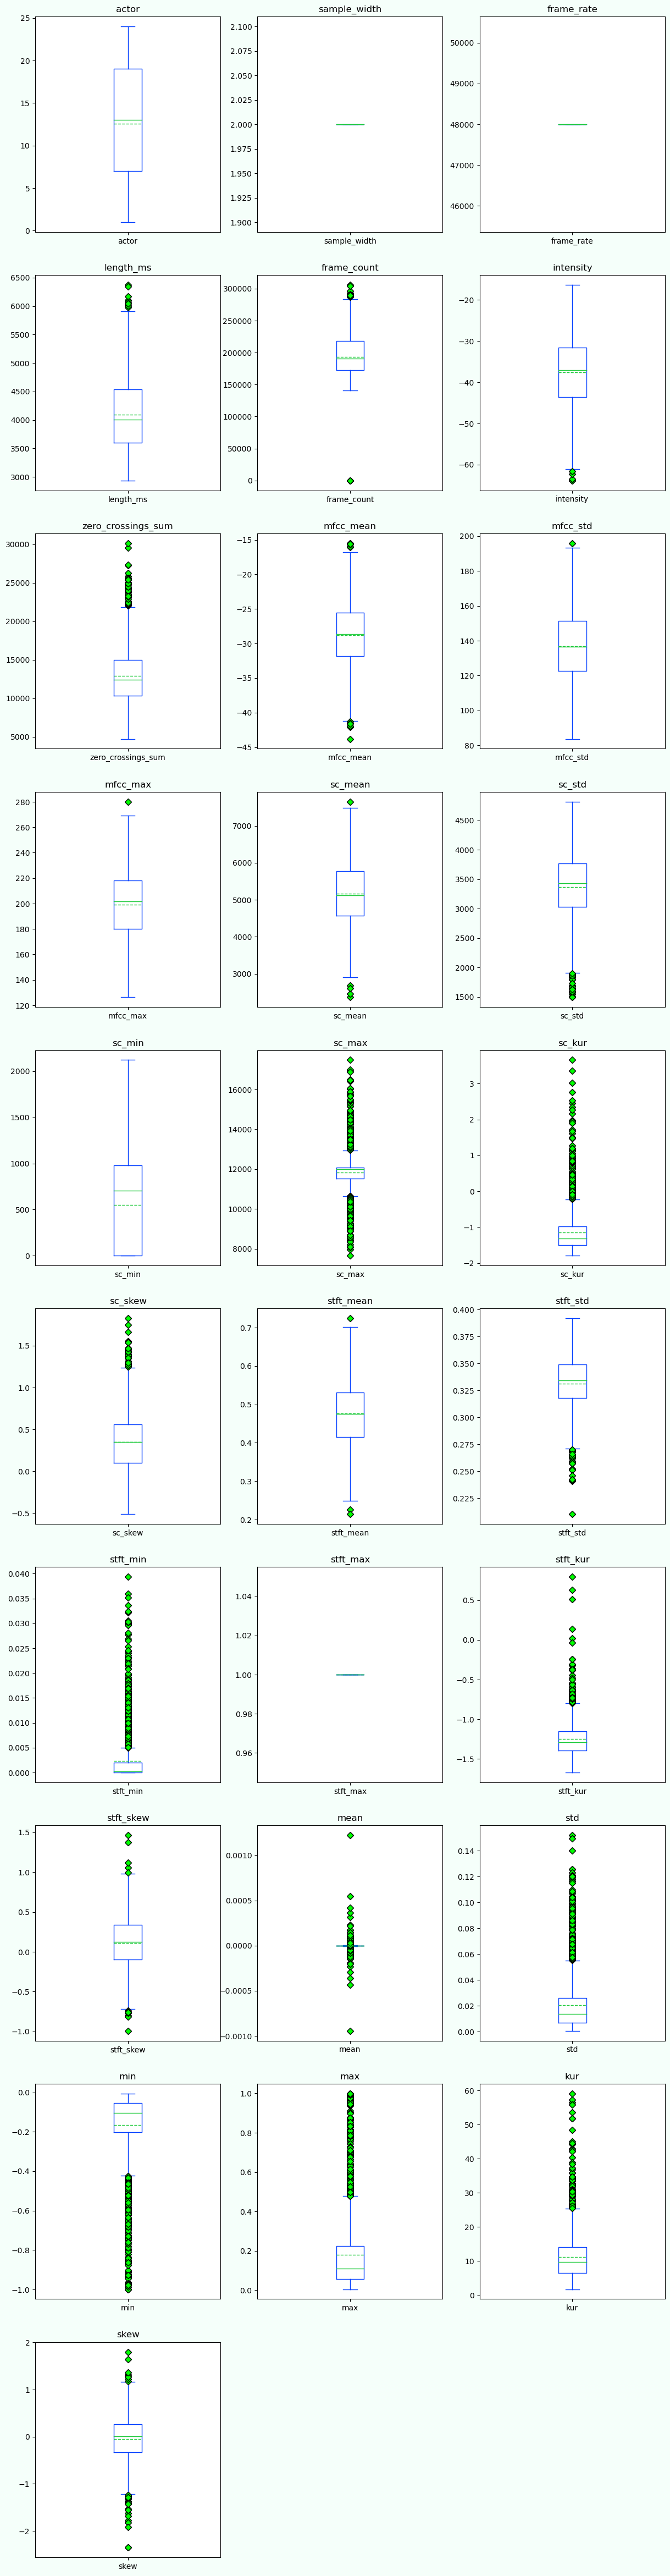

In [32]:
# Boxplot of all numerical attributes
#Istogrammi di tutti gli attributi numerici

df_no_str = df[numeric_cols]
green_diamond = dict(markerfacecolor='lime', marker='D')

fig = plt.figure(figsize=(20, 60), edgecolor = "black",facecolor='mintcream') 
fig_dims = (10, 4)

plt.subplot2grid(fig_dims, (0, 0))
df["actor"].plot.box(title = "actor",showmeans = True, meanline = True,flierprops=green_diamond)
    
plt.subplot2grid(fig_dims, (0, 1))
df['sample_width'].plot.box(title = 'sample_width',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (0, 2))
df['frame_rate'].plot.box(title = 'frame_rate',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 0))
df["length_ms"].plot.box(title = "length_ms",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 1))
df['frame_count'].plot.box(title = 'frame_count',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 2))
df['intensity'].plot.box(title = 'intensity',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 0))
df['zero_crossings_sum'].plot.box(title = 'zero_crossings_sum',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 1))
df['mfcc_mean'].plot.box(title = 'mfcc_mean',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 2))
df['mfcc_std'].plot.box(title = 'mfcc_std',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (3, 0))
df['mfcc_max'].plot.box(title = 'mfcc_max',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (3, 1))
df['sc_mean'].plot.box(title = 'sc_mean',showmeans = True, meanline = True,flierprops=green_diamond)
    
plt.subplot2grid(fig_dims, (3, 2))
df['sc_std'].plot.box(title = 'sc_std',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (4, 0))
df['sc_min'].plot.box(title = 'sc_min',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (4, 1))
df['sc_max'].plot.box(title = 'sc_max',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (4, 2))
df['sc_kur'].plot.box(title = 'sc_kur',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (5, 0))
df['sc_skew'].plot.box(title = 'sc_skew',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (5, 1))
df['stft_mean'].plot.box(title = 'stft_mean',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (5, 2))
df['stft_std'].plot.box(title = 'stft_std',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (6, 0))
df['stft_min'].plot.box(title = 'stft_min',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (6, 1))
df['stft_max'].plot.box(title = 'stft_max',showmeans = True, meanline = True,flierprops=green_diamond)  
                          
plt.subplot2grid(fig_dims, (6, 2))
df["stft_kur"].plot.box(title = "stft_kur",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (7, 0))
df['stft_skew'].plot.box(title = 'stft_skew',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (7, 1))
df['mean'].plot.box(title = 'mean',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (7, 2))
df['std'].plot.box(title = 'std',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (8, 0))
df['min'].plot.box(title = 'min',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (8, 1))
df['max'].plot.box(title = 'max',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (8, 2))
df['kur'].plot.box(title = 'kur',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (9, 0))
df['skew'].plot.box(title = 'skew',showmeans = True, meanline = True,flierprops=green_diamond)  
                          
                        

## Missing Values

In [33]:
# Getting number of Missing Values
df.isnull().sum()

modality                  0
vocal_channel           196
emotion                   0
emotional_intensity       0
statement                 0
repetition                0
actor                  1126
sex                       0
sample_width              0
frame_rate                0
length_ms                 0
frame_count               0
intensity               816
zero_crossings_sum        0
mfcc_mean                 0
mfcc_std                  0
mfcc_min                  0
mfcc_max                  0
sc_mean                   0
sc_std                    0
sc_min                    0
sc_max                    0
sc_kur                    0
sc_skew                   0
stft_mean                 0
stft_std                  0
stft_min                  0
stft_max                  0
stft_kur                  0
stft_skew                 0
mean                      0
std                       0
min                       0
max                       0
kur                       0
skew                

In [34]:
# Evaluating Missing Values in Percentage
def percentage_missing(df):
    percent_nan = round(100  * df.isnull().sum() / len(df), 2)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

percent_nan = percentage_missing(df)
percent_nan

vocal_channel     7.99
intensity        33.28
actor            45.92
dtype: float64

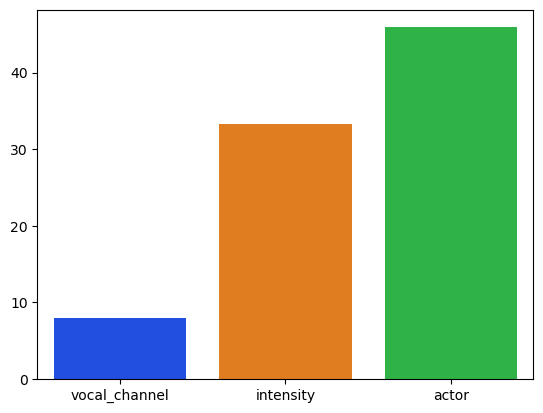

In [35]:
# Visualizing Missing Data before filling null values
sns.barplot(x = percent_nan.index, y= percent_nan)
plt.show()

In [36]:
categorical_cols

['emotion',
 'statement',
 'vocal_channel',
 'repetition',
 'sex',
 'emotional_intensity',
 'modality']

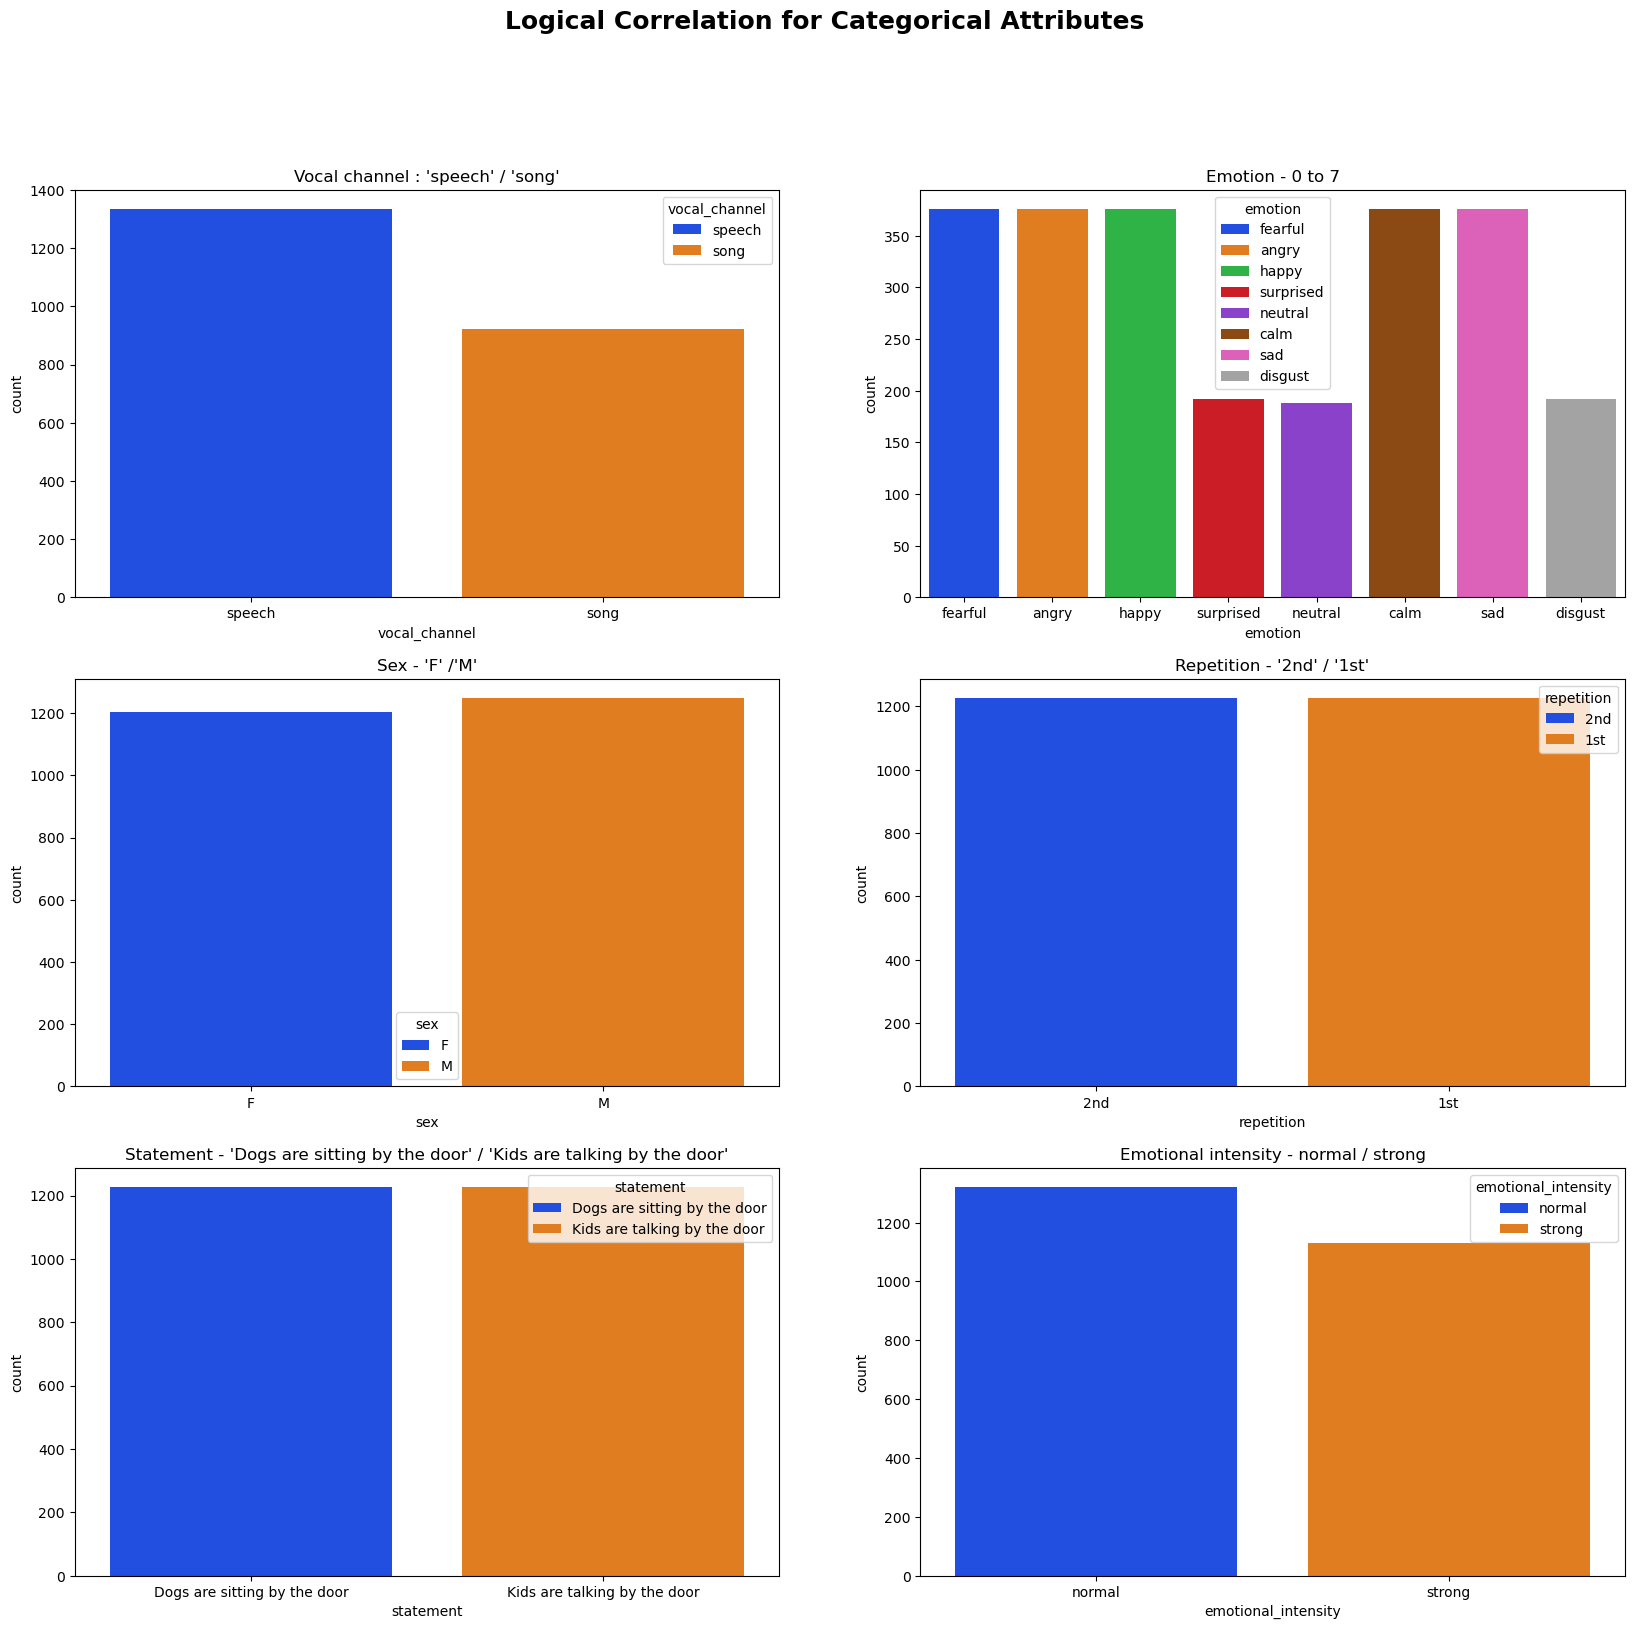

In [37]:
# axes = (ax1, ax2, ax3, ax4, ax5, ax6)
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize = (20,18)) #checking the distribution

sns.countplot(data=df, x="vocal_channel", ax= ax1, hue = "vocal_channel", dodge=False)
ax1.set_title("Vocal channel : 'speech' / 'song'")

sns.countplot(data=df, x="emotion", ax= ax2, hue = "emotion", dodge=False)
# plt.xticks(rotation =90
ax2.set_title("Emotion - 0 to 7")

sns.countplot(data=df, x="sex", ax= ax3, hue = "sex", dodge=False)
ax3.set_title("Sex - 'F' /'M'")

sns.countplot(data=df, x="repetition", ax= ax4, hue = "repetition", dodge=False)
ax4.set_title("Repetition - '2nd' / '1st'")

sns.countplot(data=df, x="statement", ax= ax5, hue = "statement", dodge=False)
ax5.set_title("Statement - 'Dogs are sitting by the door' / 'Kids are talking by the door'")

sns.countplot(data=df, x="emotional_intensity", ax= ax6, hue = "emotional_intensity", dodge=False)
ax6.set_title("Emotional intensity - normal / strong")

plt.suptitle("Logical Correlation for Categorical Attributes",fontsize = 18, fontweight='bold')
plt.show()

In [38]:
# # Converting Categorical Attributes to Numeric Values

# statement_map = {"Dogs are sitting by the door": 0, "Kids are talking by the door": 1}

# emotional_intensity_map = {"normal": 0, "strong": 1}

# emotion_map = {'neutral':0, 'calm':1, 'happy':2, 'sad':3, 'angry':4, 'fearful':5, 'disgust':6, 'surprised':7}

# modality_map = {"audio-only": 0}

# repetition_map = {"1st": 0, "2nd": 1}

# vocal_channel_map = {"speech": 0, "song": 1}

# sex_map = {"M": 0, "F": 1}

# df.replace({"sex": sex_map, "emotional_intensity": emotional_intensity_map, 
#             "vocal_channel": vocal_channel_map, "repetition": repetition_map, 
#            "statement": statement_map, "modality": modality_map, "emotion": emotion_map}, inplace=True)

speech    1335
song       921
Name: vocal_channel, dtype: int64


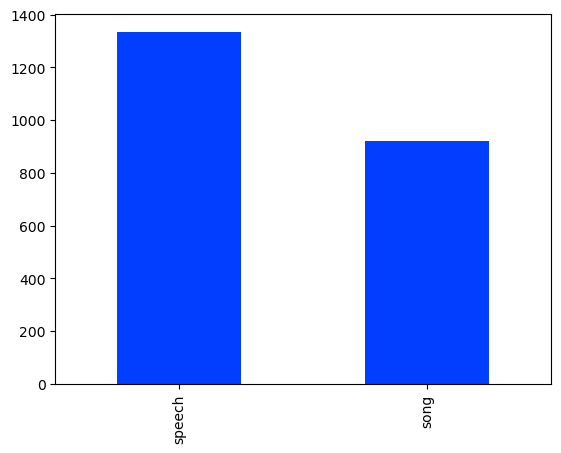

In [39]:
# Unique Value counts
# vocal_channel
print(df["vocal_channel"].value_counts())
df["vocal_channel"].value_counts().plot.bar()
plt.show()

In [40]:
df['vocal_channel'].mode()

0    speech
Name: vocal_channel, dtype: object

In [41]:
# df["x"].fillna(.df["x"]mode())

In [42]:
df['vocal_channel'].fillna(df['vocal_channel'].mode()[0])

0       speech
1       speech
2       speech
3       speech
4         song
         ...  
2447    speech
2448    speech
2449      song
2450    speech
2451    speech
Name: vocal_channel, Length: 2452, dtype: object

In [43]:
# Filling Missing Values ("vocal_channel")
# Trying with mean and median
# print(df['vocal_channel'].mean()) # We cant use becuase we have to fill with either 1 or 0, not a float value
# print(df['vocal_channel'].median()) # Both median and mode gives the same value, 0 (but we prefer the highest occurence)

# Now, filling missing value with mode
df['vocal_channel'].fillna(df['vocal_channel'].mode()[0], inplace=True)

In [44]:
# Checking vocal_channel attribute, if it has null values still
df['vocal_channel'].isnull().sum()

0

In [45]:
# Checking Percentage Nan after filling vocal channel
percent_nan = percentage_missing(df)
percent_nan

intensity    33.28
actor        45.92
dtype: float64

In [46]:
# Unique Value counts
# intensity
# df["intensity"].value_counts()
# Does"nt make sense to plot, becuase intensity is a continuous value attribute

In [47]:
# Filling Missing Values ("intensity")
df["intensity"].describe()

count    1636.000000
mean      -37.625332
std         8.451982
min       -63.864613
25%       -43.539869
50%       -37.072745
75%       -31.591309
max       -16.353953
Name: intensity, dtype: float64

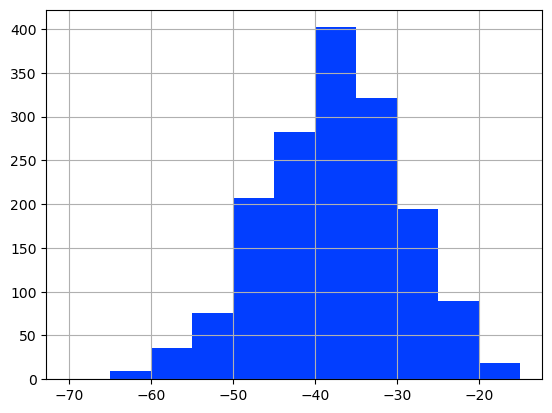

In [48]:
# Histogram before filling missing values
df['intensity'].hist(bins=np.arange(-70,-10,5))
plt.show()

In [49]:
categorical_cols

['emotion',
 'statement',
 'vocal_channel',
 'repetition',
 'sex',
 'emotional_intensity',
 'modality']

In [50]:
df.corr()["intensity"].sort_values()

mfcc_std             -0.978744
min                  -0.810253
sc_std               -0.440724
mfcc_max             -0.386237
stft_mean            -0.355795
sc_mean              -0.333510
stft_min             -0.277603
sc_max               -0.223566
kur                  -0.174999
stft_kur             -0.082772
mean                  0.016175
actor                 0.061923
sc_min                0.110529
frame_count           0.215516
stft_std              0.254968
length_ms             0.293782
sc_kur                0.369371
stft_skew             0.391700
skew                  0.411307
sc_skew               0.418625
zero_crossings_sum    0.497906
mfcc_mean             0.610094
max                   0.808436
std                   0.845225
mfcc_min              0.973981
intensity             1.000000
sample_width               NaN
frame_rate                 NaN
stft_max                   NaN
Name: intensity, dtype: float64

In [51]:
type(categorical_cols)

list

In [52]:
# Checking corelation with all categorical attributes
corr_inten = categorical_cols + ["intensity"]
df[corr_inten].corr()["intensity"].sort_values()

intensity    1.0
Name: intensity, dtype: float64

In [53]:
# We have to fill missing values of intensity using Emotion, emotional intensity and vocal channel (By Intution)
df['intensity'] = df['intensity'].groupby(
    [df['emotional_intensity'], df["vocal_channel"], df['emotion']]).apply(lambda x: x.fillna(x.mean()))
df['intensity'].groupby(
    [df['emotional_intensity'], df["vocal_channel"], df['emotion']]).mean()

emotional_intensity  vocal_channel  emotion  
normal               song           angry       -31.828173
                                    calm        -39.059685
                                    fearful     -37.385224
                                    happy       -33.632325
                                    neutral     -37.407659
                                    sad         -38.660568
                     speech         angry       -36.663681
                                    calm        -48.044535
                                    disgust     -44.372406
                                    fearful     -40.431263
                                    happy       -40.756993
                                    neutral     -46.112212
                                    sad         -48.324942
                                    surprised   -40.995773
strong               song           angry       -25.830534
                                    calm        -39.345076
          

In [54]:
# df["intensity"].describe() before filling missing values
# count    1636.000000
# mean      -37.625332
# std         8.451982
# min       -63.864613
# 25%       -43.539869
# 50%       -37.072745
# 75%       -31.591309
# max       -16.353953
# Name: intensity, dtype: float64

In [55]:
# df['intensity'].describe() After filling missing values
# The statistical values are intact with the previous values, 
# meaning that the values filled are with in the normal distribution
df['intensity'].describe() 

count    2452.000000
mean      -37.636534
std         7.881926
min       -63.864613
25%       -42.850759
50%       -37.407659
75%       -31.828173
max       -16.353953
Name: intensity, dtype: float64

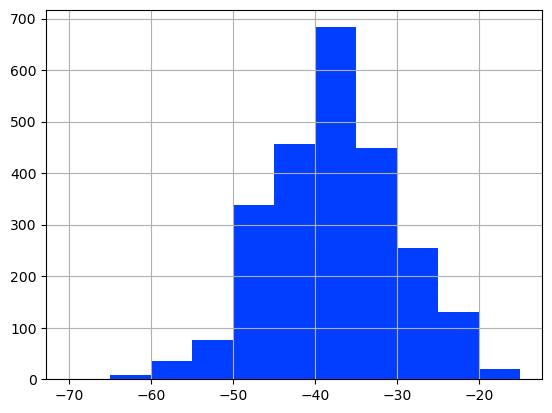

In [56]:
# Histogram after filling missing values
df['intensity'].hist(bins=np.arange(-70,-10,5))
plt.show()

In [57]:
# Checking Percentage Nan after filling intensity
percent_nan = percentage_missing(df)
percent_nan

actor    45.92
dtype: float64

1.0     51
2.0     58
3.0     51
4.0     52
5.0     58
6.0     55
7.0     51
8.0     61
9.0     51
10.0    56
11.0    55
12.0    63
13.0    60
14.0    62
15.0    44
16.0    58
17.0    55
18.0    35
19.0    60
20.0    61
21.0    55
22.0    65
23.0    51
24.0    58
Name: actor, dtype: int64


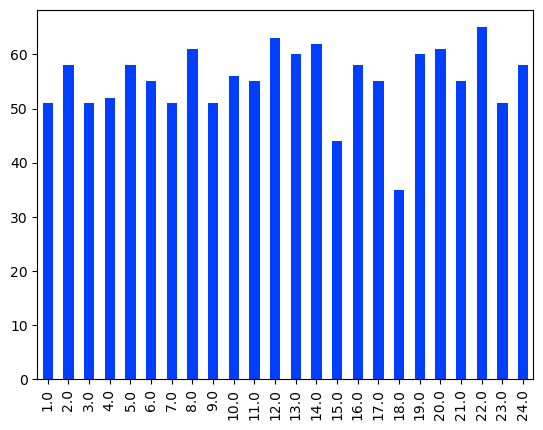

In [58]:
# Unique Value counts
# actor
print(df["actor"].value_counts().sort_index())
df["actor"].value_counts().sort_index().plot.bar()
plt.show()

In [59]:
# Checking corelation with all categorical attributes
corr_inten = categorical_cols + ["actor"]
df[corr_inten].corr()["actor"].sort_values()

actor    1.0
Name: actor, dtype: float64

In [60]:
# Checking correlation of "actor" with other attributes
df.corr()["actor"].sort_values()

sc_kur               -0.132716
sc_skew              -0.066964
mfcc_mean            -0.065308
stft_kur             -0.064000
zero_crossings_sum   -0.059671
sc_min               -0.046160
stft_mean            -0.039657
mfcc_max             -0.028036
kur                  -0.023939
mfcc_std             -0.012426
min                  -0.009776
stft_skew             0.007862
max                   0.015928
mean                  0.020220
stft_min              0.027860
intensity             0.031179
std                   0.032818
frame_count           0.039325
length_ms             0.043038
mfcc_min              0.045965
sc_mean               0.060292
skew                  0.065606
stft_std              0.082993
sc_max                0.083882
sc_std                0.119453
actor                 1.000000
sample_width               NaN
frame_rate                 NaN
stft_max                   NaN
Name: actor, dtype: float64

In [61]:
# dropping "actor" attribute 
df.drop("actor", axis = 1, inplace=True)

In [62]:
# Checking Percentage Nan after dropping actor 
percent_nan = percentage_missing(df)
percent_nan

Series([], dtype: float64)

In [63]:
# # correlation of attributes
# df.corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

In [64]:
# dropping unnecessary attribues
df = df.drop(labels=["sample_width", "frame_rate", "stft_max", "modality"], axis=1) #Removing non-correlation attributes

In [65]:
# correlation of attributes after dropping 4 attributes
df.corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

In [66]:
# Distributions

In [67]:
# Checking Skew and Kurtosis

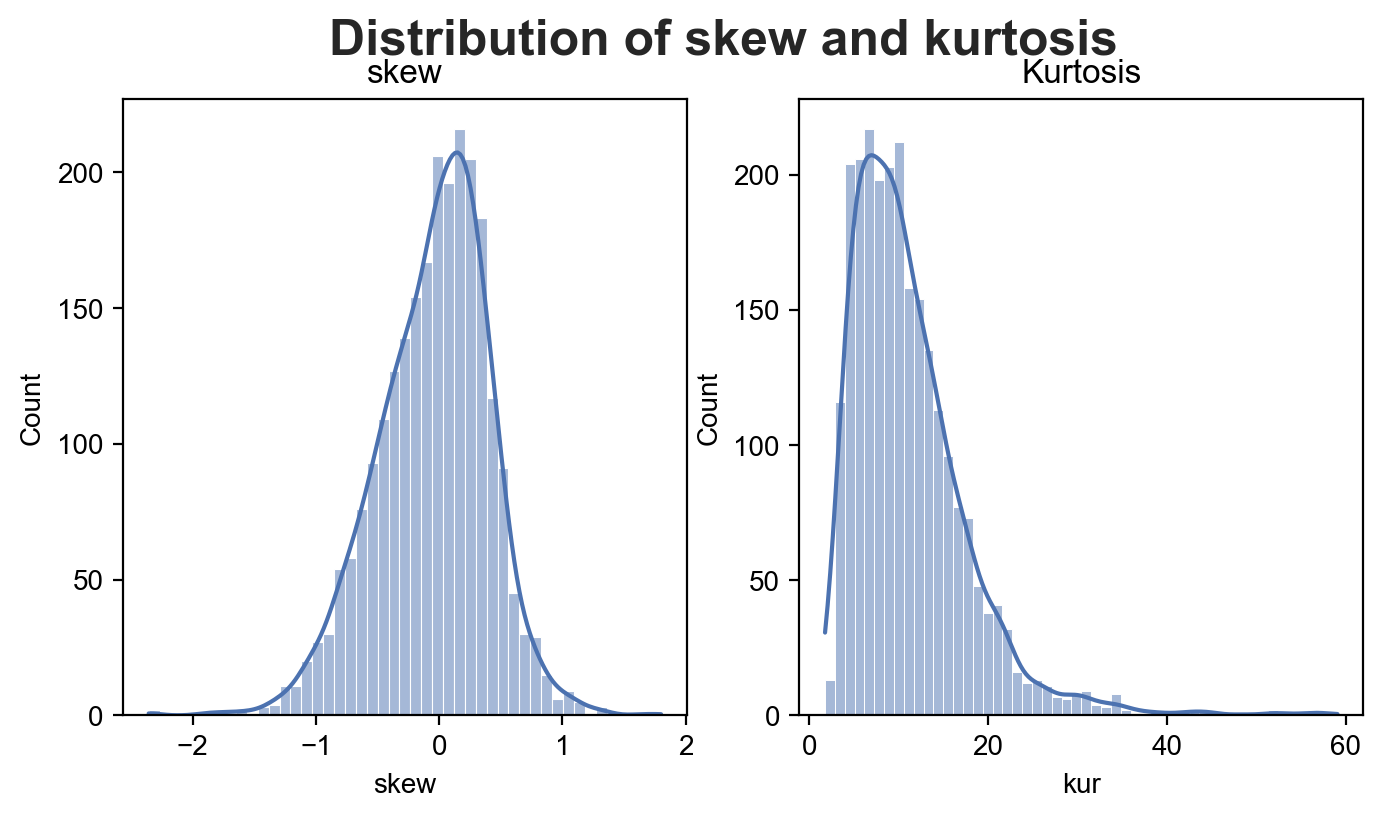

In [68]:
# Calculate the skewness
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,4), dpi=200)
sns.set(style='darkgrid')

sns.histplot(data=df,x='skew',kde=True, ax = ax1)
ax1.set_title("skew")

sns.histplot(data=df,x='kur',kde=True, ax = ax2)
ax2.set_title("Kurtosis")

plt.suptitle("Distribution of skew and kurtosis",fontsize = 18, fontweight='bold')
plt.show()

In [69]:
# The distribution is almost symmentric with little hinge away from 0 at the mode.(skew)so we can conclude its normally distributed.
# kurtosis for normal distribution is equal to 3, as we have higher distribution between 0 and 20, we could understand that
# the distribution is leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.


In [70]:
categorical_cols.remove("modality")

In [71]:
plot_num_cols =numeric_cols[3:]

In [72]:
plot_num_cols.remove("stft_max")

<AxesSubplot:title={'center':'skew'}, ylabel='Frequency'>

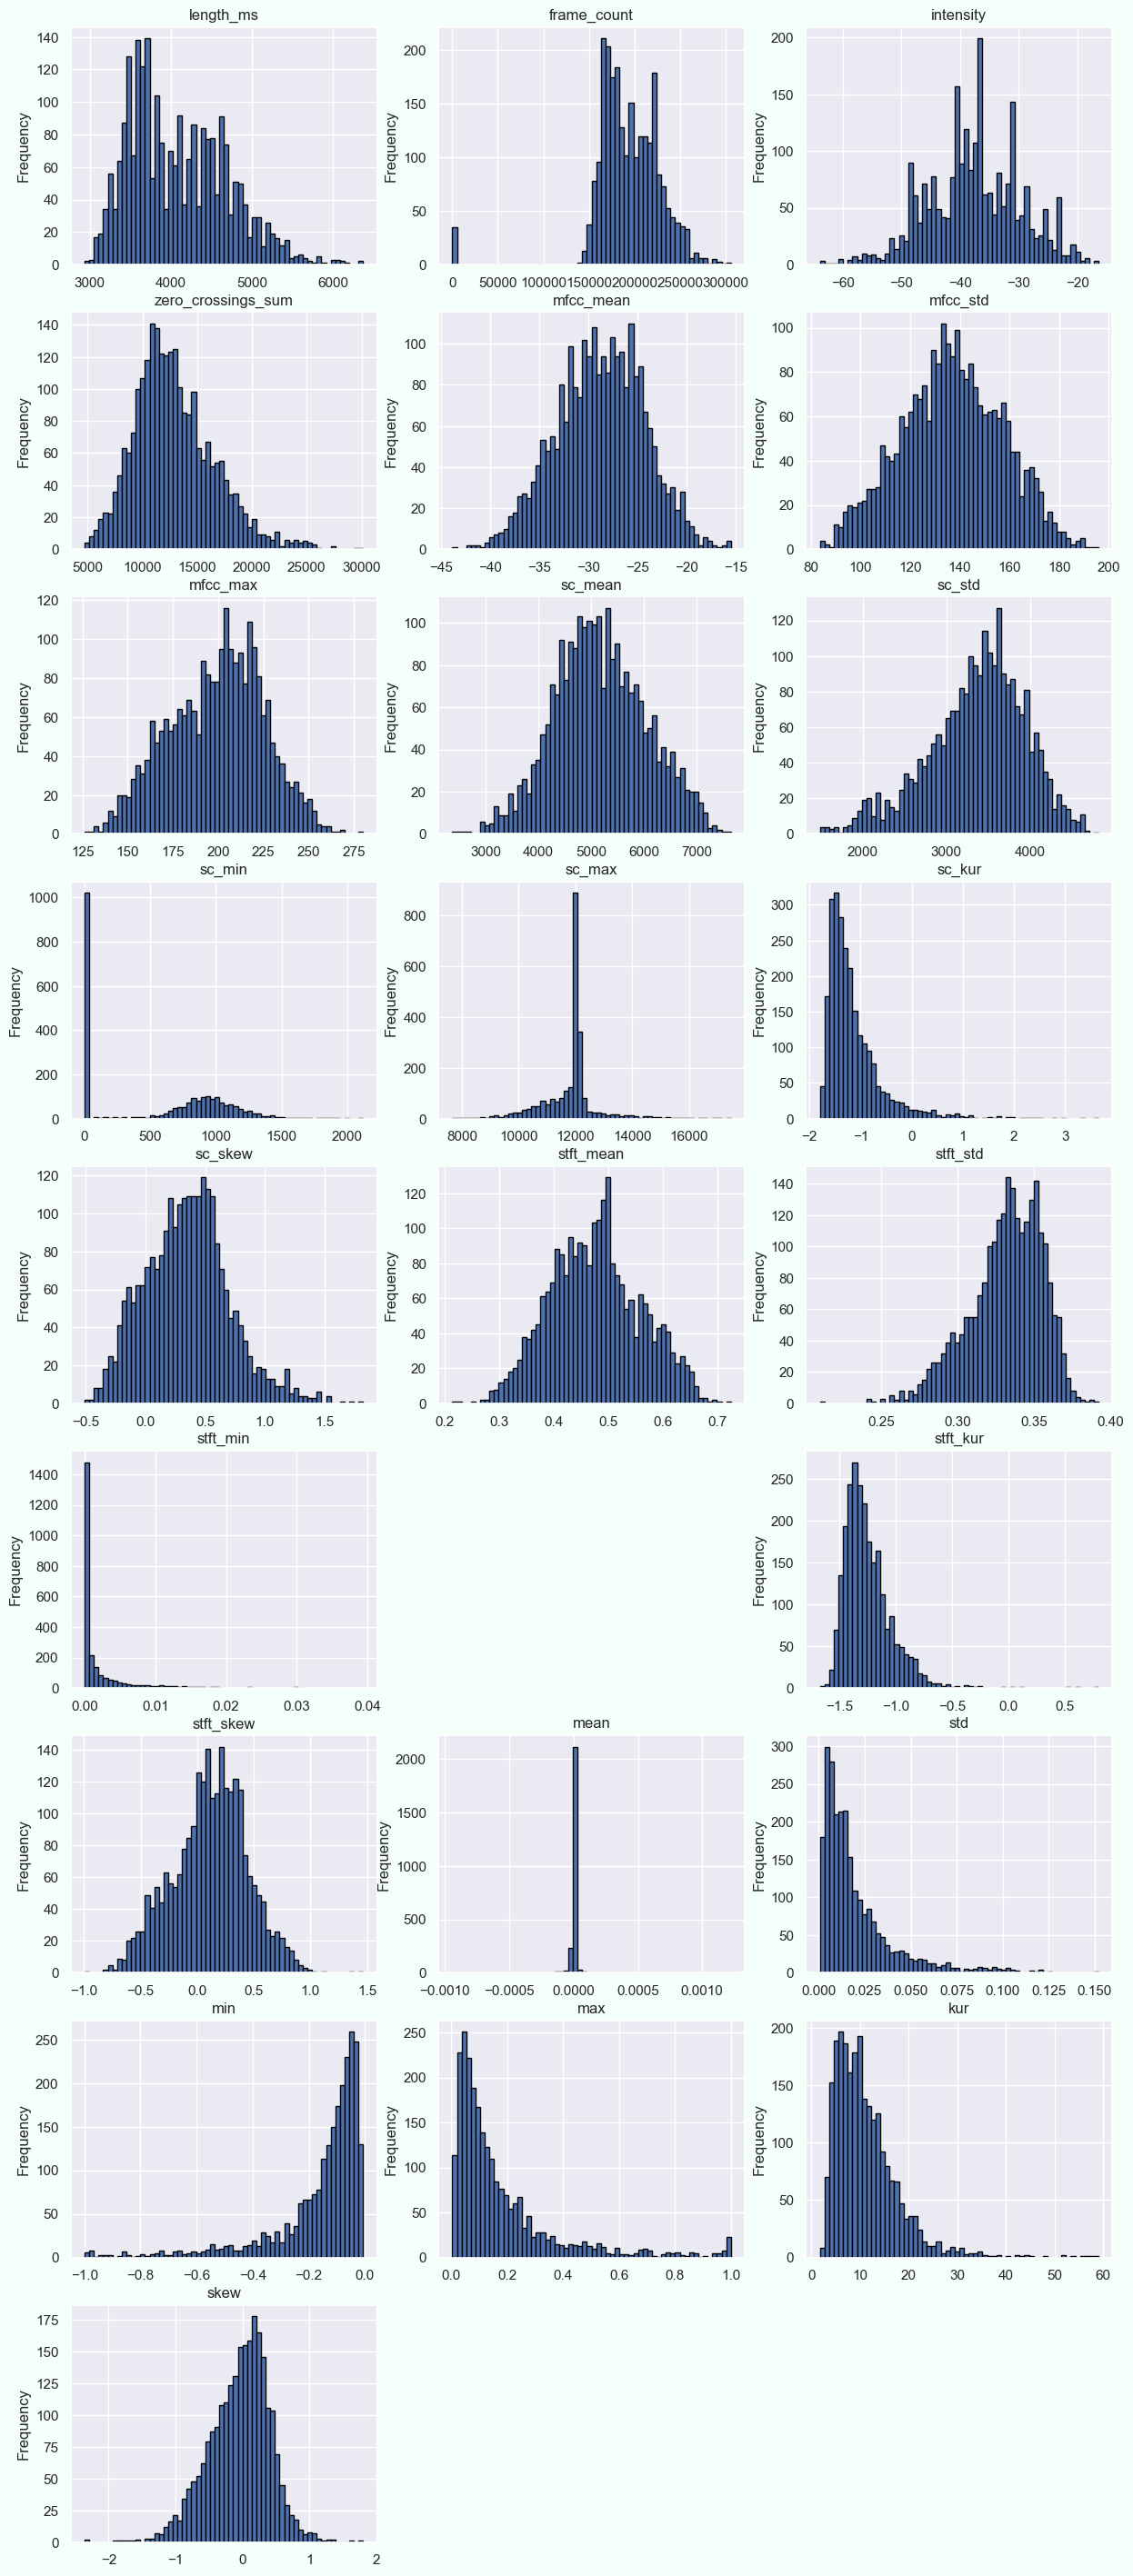

In [73]:
# Histogram of all numerical attributes

df_no_str = df[plot_num_cols]
fig = plt.figure(figsize=(20, 40), edgecolor = "black",facecolor='mintcream') 
fig_dims = (10, 4)

# plt.subplot2grid(fig_dims, (0, 0))
# df["actor"].plot.hist(title = "actor", edgecolor = "black", bins = 60 )
    
# plt.subplot2grid(fig_dims, (0, 1))
# df['sample_width'].plot.hist(title = 'sample_width', edgecolor = "black", bins = 60 )

# plt.subplot2grid(fig_dims, (0, 2))
# df['frame_rate'].plot.hist(title = 'frame_rate', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (1, 0))
df["length_ms"].plot.hist(title = "length_ms", edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (1, 1))
df['frame_count'].plot.hist(title = 'frame_count', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (1, 2))
df['intensity'].plot.hist(title = 'intensity', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (2, 0))
df['zero_crossings_sum'].plot.hist(title = 'zero_crossings_sum', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (2, 1))
df['mfcc_mean'].plot.hist(title = 'mfcc_mean', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (2, 2))
df['mfcc_std'].plot.hist(title = 'mfcc_std', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (3, 0))
df['mfcc_max'].plot.hist(title = 'mfcc_max', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (3, 1))
df['sc_mean'].plot.hist(title = 'sc_mean', edgecolor = "black", bins = 60 )
    
plt.subplot2grid(fig_dims, (3, 2))
df['sc_std'].plot.hist(title = 'sc_std', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (4, 0))
df['sc_min'].plot.hist(title = 'sc_min', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (4, 1))
df['sc_max'].plot.hist(title = 'sc_max', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (4, 2))
df['sc_kur'].plot.hist(title = 'sc_kur', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (5, 0))
df['sc_skew'].plot.hist(title = 'sc_skew', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (5, 1))
df['stft_mean'].plot.hist(title = 'stft_mean', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (5, 2))
df['stft_std'].plot.hist(title = 'stft_std', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (6, 0))
df['stft_min'].plot.hist(title = 'stft_min', edgecolor = "black", bins = 60 )

# plt.subplot2grid(fig_dims, (6, 1))
# df['stft_max'].plot.box(title = 'stft_max', edgecolor = "black", bins = 60 )  
                          
plt.subplot2grid(fig_dims, (6, 2))
df["stft_kur"].plot.hist(title = "stft_kur", edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (7, 0))
df['stft_skew'].plot.hist(title = 'stft_skew', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (7, 1))
df['mean'].plot.hist(title = 'mean', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (7, 2))
df['std'].plot.hist(title = 'std', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (8, 0))
df['min'].plot.hist(title = 'min', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (8, 1))
df['max'].plot.hist(title = 'max', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (8, 2))
df['kur'].plot.hist(title = 'kur', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (9, 0))
df['skew'].plot.hist(title = 'skew', edgecolor = "black", bins = 60 ) 
                          
                        

<AxesSubplot:title={'center':'skew'}>

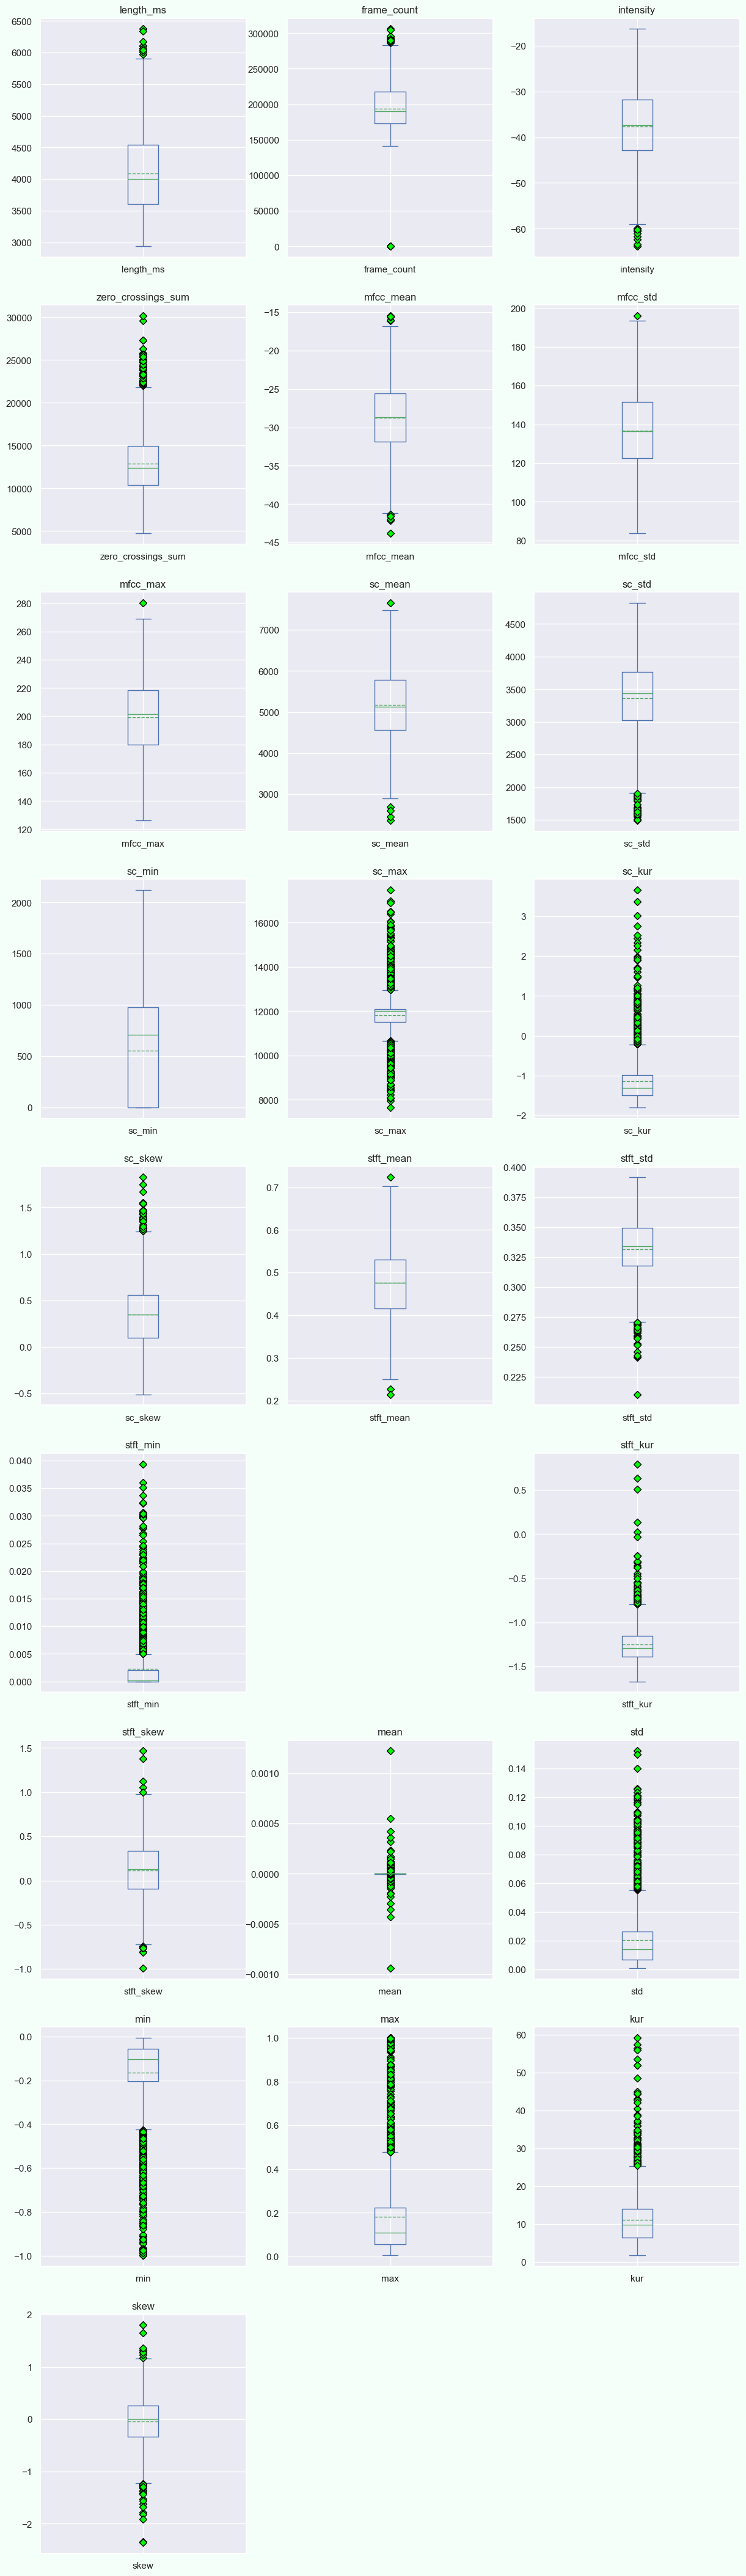

In [75]:
# Boxplot of all numerical attributes
#Istogrammi di tutti gli attributi numerici

df_no_str = df[plot_num_cols]
green_diamond = dict(markerfacecolor='lime', marker='D')

fig = plt.figure(figsize=(20, 60), edgecolor = "black",facecolor='mintcream') 
fig_dims = (10, 4)

# plt.subplot2grid(fig_dims, (0, 0))
# df["actor"].plot.box(title = "actor",showmeans = True, meanline = True,flierprops=green_diamond)
    
# plt.subplot2grid(fig_dims, (0, 1))
# df['sample_width'].plot.box(title = 'sample_width',showmeans = True, meanline = True,flierprops=green_diamond)

# plt.subplot2grid(fig_dims, (0, 2))
# df['frame_rate'].plot.box(title = 'frame_rate',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 0))
df["length_ms"].plot.box(title = "length_ms",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 1))
df['frame_count'].plot.box(title = 'frame_count',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 2))
df['intensity'].plot.box(title = 'intensity',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 0))
df['zero_crossings_sum'].plot.box(title = 'zero_crossings_sum',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 1))
df['mfcc_mean'].plot.box(title = 'mfcc_mean',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 2))
df['mfcc_std'].plot.box(title = 'mfcc_std',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (3, 0))
df['mfcc_max'].plot.box(title = 'mfcc_max',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (3, 1))
df['sc_mean'].plot.box(title = 'sc_mean',showmeans = True, meanline = True,flierprops=green_diamond)
    
plt.subplot2grid(fig_dims, (3, 2))
df['sc_std'].plot.box(title = 'sc_std',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (4, 0))
df['sc_min'].plot.box(title = 'sc_min',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (4, 1))
df['sc_max'].plot.box(title = 'sc_max',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (4, 2))
df['sc_kur'].plot.box(title = 'sc_kur',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (5, 0))
df['sc_skew'].plot.box(title = 'sc_skew',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (5, 1))
df['stft_mean'].plot.box(title = 'stft_mean',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (5, 2))
df['stft_std'].plot.box(title = 'stft_std',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (6, 0))
df['stft_min'].plot.box(title = 'stft_min',showmeans = True, meanline = True,flierprops=green_diamond)

# plt.subplot2grid(fig_dims, (6, 1))
# df['stft_max'].plot.box(title = 'stft_max',showmeans = True, meanline = True,flierprops=green_diamond)  
                          
plt.subplot2grid(fig_dims, (6, 2))
df["stft_kur"].plot.box(title = "stft_kur",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (7, 0))
df['stft_skew'].plot.box(title = 'stft_skew',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (7, 1))
df['mean'].plot.box(title = 'mean',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (7, 2))
df['std'].plot.box(title = 'std',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (8, 0))
df['min'].plot.box(title = 'min',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (8, 1))
df['max'].plot.box(title = 'max',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (8, 2))
df['kur'].plot.box(title = 'kur',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (9, 0))
df['skew'].plot.box(title = 'skew',showmeans = True, meanline = True,flierprops=green_diamond)  
                          
                        

In [76]:
# Converting Categorical Attributes to Numeric Values

statement_map = {"Dogs are sitting by the door": 0, "Kids are talking by the door": 1}

emotional_intensity_map = {"normal": 0, "strong": 1}

emotion_map = {'neutral':0, 'calm':1, 'happy':2, 'sad':3, 'angry':4, 'fearful':5, 'disgust':6, 'surprised':7}

modality_map = {"audio-only": 0}

repetition_map = {"1st": 0, "2nd": 1}

vocal_channel_map = {"speech": 0, "song": 1}

sex_map = {"M": 0, "F": 1}

df.replace({"sex": sex_map, "emotional_intensity": emotional_intensity_map, 
            "vocal_channel": vocal_channel_map, "repetition": repetition_map, 
           "statement": statement_map, "modality": modality_map, "emotion": emotion_map}, inplace=True)

In [77]:
categorical_cols

['emotion',
 'statement',
 'vocal_channel',
 'repetition',
 'sex',
 'emotional_intensity']

In [78]:
df.corr()["vocal_channel"].sort_values(ascending=False).nlargest(4)[2:4]

frame_count    0.553301
sc_skew        0.535300
Name: vocal_channel, dtype: float64

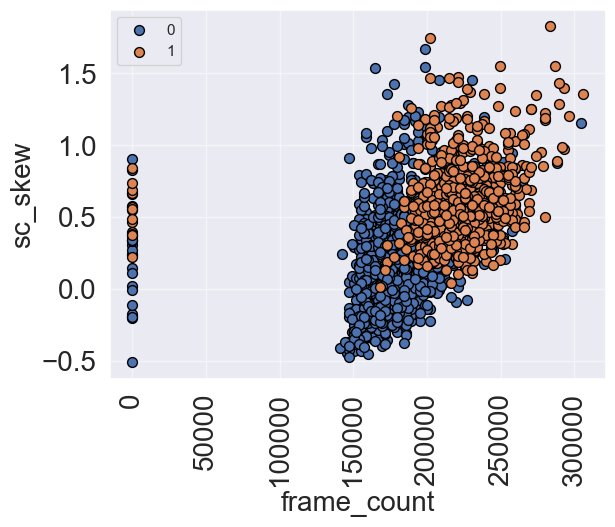

In [79]:
vals = list(df['vocal_channel'].unique())
x = 'frame_count'
y = 'sc_skew'

for val in vals:
    df_val = df[df['vocal_channel']==val]
    plt.scatter(df_val[x], df_val[y], s=50, edgecolor='black', label=val)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

plt.xlabel(x, fontsize=20)
plt.ylabel(y, fontsize=20)

plt.grid(alpha=0.5)
plt.legend(loc='best')
plt.show()

In [80]:
df.corr()['emotional_intensity'].sort_values(ascending=False).nlargest(4)[2:4]

intensity    0.405504
mfcc_min     0.403562
Name: emotional_intensity, dtype: float64

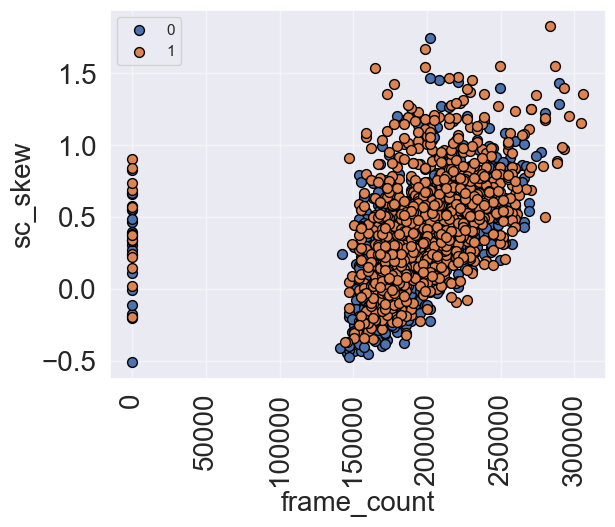

In [81]:
vals = list(df['emotional_intensity'].unique())
x = 'frame_count'
y = 'sc_skew'

for val in vals:
    df_val = df[df['emotional_intensity']==val]
    plt.scatter(df_val[x], df_val[y], s=50, edgecolor='black', label=val)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

plt.xlabel(x, fontsize=20)
plt.ylabel(y, fontsize=20)

plt.grid(alpha=0.5)
plt.legend(loc='best')
plt.show()

In [82]:
df.corr()["statement"].sort_values(ascending=False).nlargest(4)[2:4]

stft_kur    0.079564
sc_skew     0.076676
Name: statement, dtype: float64

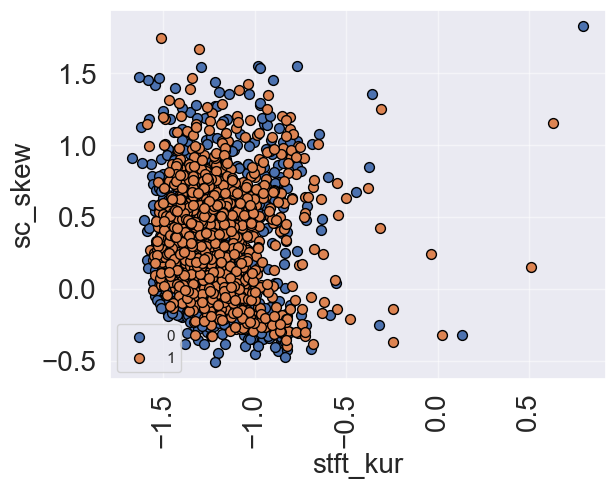

In [83]:
vals = list(df["statement"].unique())
x = 'stft_kur'
y = 'sc_skew'

for val in vals:
    df_val = df[df["statement"]==val]
    plt.scatter(df_val[x], df_val[y], s=50, edgecolor='black', label=val)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

plt.xlabel(x, fontsize=20)
plt.ylabel(y, fontsize=20)

plt.grid(alpha=0.5)
plt.legend(loc='best')
plt.show()

In [84]:
df.corr()['emotion'].sort_values(ascending=False).nlargest(4)[2:4]

intensity    0.222093
mfcc_mean    0.199870
Name: emotion, dtype: float64

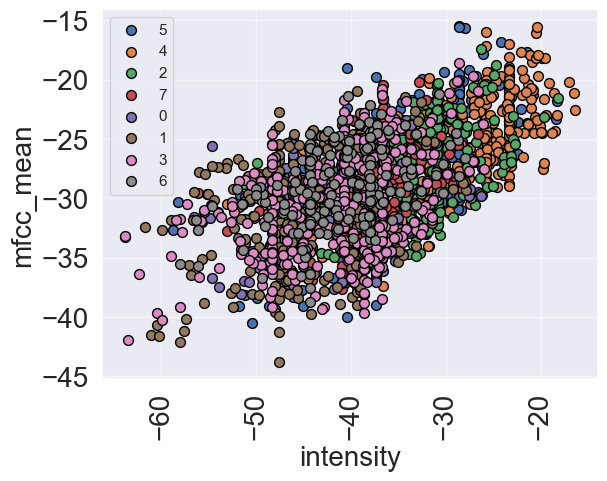

In [85]:
vals = list(df['emotion'].unique())
x = "intensity"
y = 'mfcc_mean'

for val in vals:
    df_val = df[df['emotion']==val]
    plt.scatter(df_val[x], df_val[y], s=50, edgecolor='black', label=val)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

plt.xlabel(x, fontsize=20)
plt.ylabel(y, fontsize=20)

plt.grid(alpha=0.5)
plt.legend(loc='best')
plt.show()

In [86]:
df.corr()['repetition'].sort_values(ascending=False).nlargest(4)[2:4]

std                   0.018927
zero_crossings_sum    0.016961
Name: repetition, dtype: float64

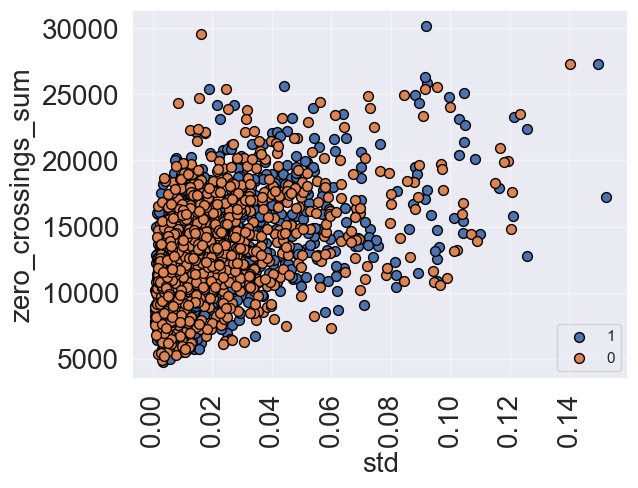

In [87]:
vals = list(df['repetition'].unique())
x = "std"
y = 'zero_crossings_sum'

for val in vals:
    df_val = df[df['repetition']==val]
    plt.scatter(df_val[x], df_val[y], s=50, edgecolor='black', label=val)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

plt.xlabel(x, fontsize=20)
plt.ylabel(y, fontsize=20)

plt.grid(alpha=0.5)
plt.legend(loc='best')
plt.show()

In [88]:
df.corr()['sex'].sort_values(ascending=False).nlargest(4)[2:4]

stft_skew             0.462716
zero_crossings_sum    0.389077
Name: sex, dtype: float64

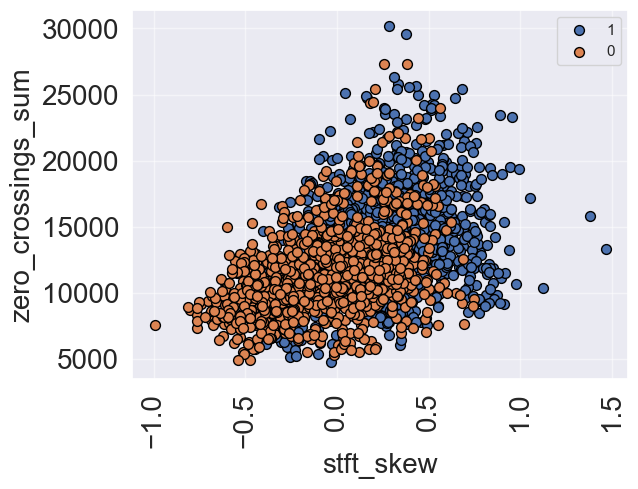

In [89]:
vals = list(df['sex'].unique())
x = "stft_skew"
y = 'zero_crossings_sum'

for val in vals:
    df_val = df[df['sex']==val]
    plt.scatter(df_val[x], df_val[y], s=50, edgecolor='black', label=val)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

plt.xlabel(x, fontsize=20)
plt.ylabel(y, fontsize=20)

plt.grid(alpha=0.5)
plt.legend(loc='best')
plt.show()

## Removing Outliers

In [90]:
df.columns

Index(['vocal_channel', 'emotion', 'emotional_intensity', 'statement',
       'repetition', 'sex', 'length_ms', 'frame_count', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max',
       'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew',
       'stft_mean', 'stft_std', 'stft_min', 'stft_kur', 'stft_skew', 'mean',
       'std', 'min', 'max', 'kur', 'skew'],
      dtype='object')

In [91]:
for x in df.columns:
    if(len(df[x].unique()) <=8):
        print(x)

vocal_channel
emotion
emotional_intensity
statement
repetition
sex


In [92]:
df.corr()["vocal_channel"]

vocal_channel          1.000000
emotion               -0.228466
emotional_intensity   -0.010461
statement             -0.005895
repetition             0.009264
sex                   -0.030720
length_ms              0.723755
frame_count            0.553301
intensity              0.289309
zero_crossings_sum     0.132020
mfcc_mean              0.039050
mfcc_std              -0.263008
mfcc_min               0.178794
mfcc_max              -0.256818
sc_mean               -0.488268
sc_std                -0.129643
sc_min                -0.041057
sc_max                -0.117746
sc_kur                 0.222490
sc_skew                0.535300
stft_mean             -0.454655
stft_std               0.383234
stft_min              -0.189567
stft_kur              -0.122833
stft_skew              0.481213
mean                   0.025549
std                    0.121557
min                   -0.019743
max                    0.023708
kur                   -0.492654
skew                   0.025807
Name: vo

In [93]:
df.corr()["skew"].nlargest(3).sort_values()

intensity    0.367261
mfcc_min     0.392090
skew         1.000000
Name: skew, dtype: float64

In [94]:
df.corr()["kur"].nlargest(3).sort_values()

stft_min     0.303401
stft_mean    0.405836
kur          1.000000
Name: kur, dtype: float64

In [95]:
# df.corr()['vocal_channel'].nlargest(3).sort_values()

In [96]:
df.columns

Index(['vocal_channel', 'emotion', 'emotional_intensity', 'statement',
       'repetition', 'sex', 'length_ms', 'frame_count', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max',
       'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew',
       'stft_mean', 'stft_std', 'stft_min', 'stft_kur', 'stft_skew', 'mean',
       'std', 'min', 'max', 'kur', 'skew'],
      dtype='object')

In [97]:
df.corr()["kur"].nsmallest(3).sort_values()

vocal_channel   -0.492654
length_ms       -0.460723
stft_std        -0.413683
Name: kur, dtype: float64

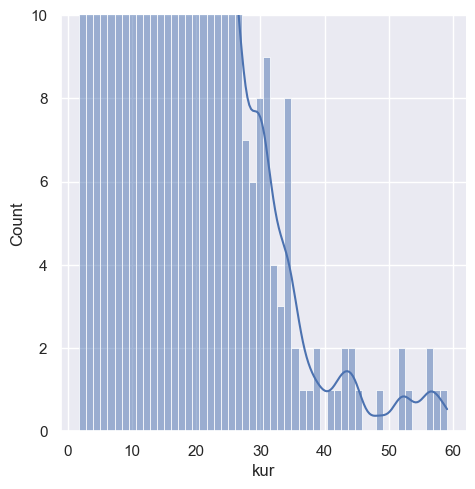

In [98]:
sns.displot(df["kur"], kde=True)
plt.ylim(0, 10)
plt.show()

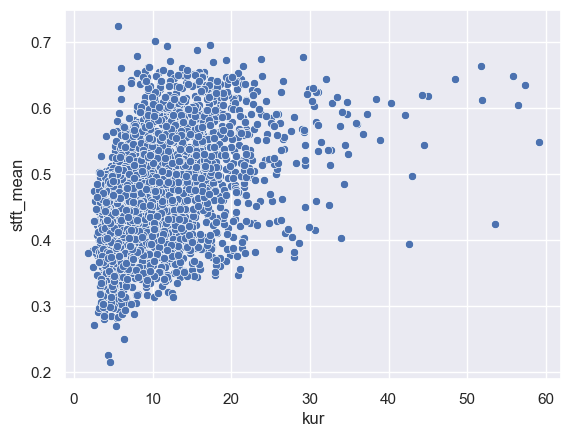

In [99]:
sns.scatterplot(x='kur',y='stft_mean',data=df)
plt.show()

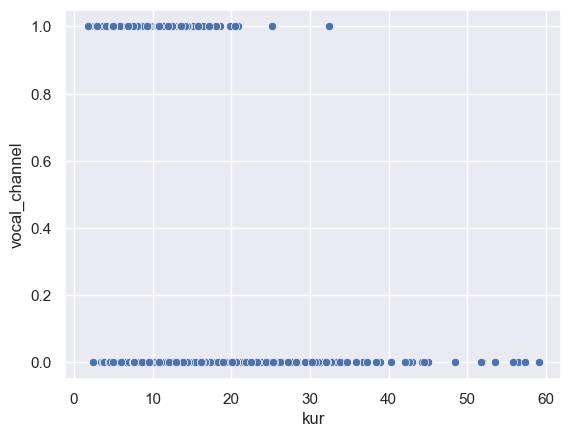

In [100]:
sns.scatterplot(x='kur',y='vocal_channel',data=df)
plt.show()

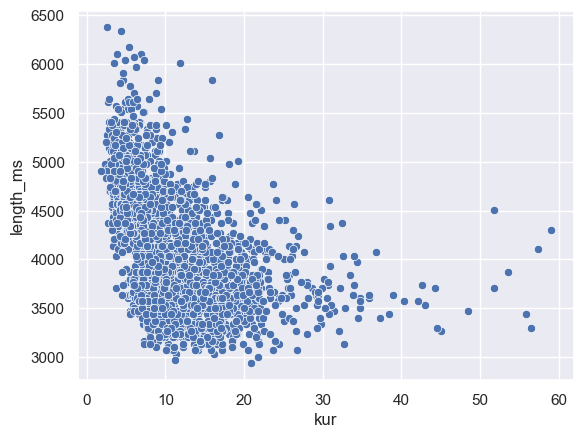

In [101]:
sns.scatterplot(x='kur',y='length_ms',data=df)
plt.show()

In [102]:
# sns.catplot(x='vocal_channel',y='kur',data=df,kind='box')
# plt.show()

In [103]:
# sns.boxplot(x="vocal_channel", y="kur", hue="vocal_channel", data=df)
# plt.legend(loc="best")
# plt.show()

In [104]:
df.columns

Index(['vocal_channel', 'emotion', 'emotional_intensity', 'statement',
       'repetition', 'sex', 'length_ms', 'frame_count', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max',
       'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew',
       'stft_mean', 'stft_std', 'stft_min', 'stft_kur', 'stft_skew', 'mean',
       'std', 'min', 'max', 'kur', 'skew'],
      dtype='object')

In [105]:
main_att = ['vocal_channel', 'emotion', 'emotional_intensity', 'statement',
       'repetition', 'sex', 'zero_crossings_sum']
# high_corr = ["length_ms", frame_count", "intensity", "stft_kur", "std", "stft_skew", "sc_std", "skew", "kur"]
# high_corr = ['sc_kur', 'stft_kur', "kur", "std", "intensity", "skew"]

# plot_att = main_att + high_corr

In [106]:
# df.corr()["vocal_channel"].nlargest().sort_values

In [107]:
# df["frame_count"].groupby(df["vocal_channel"]).describe(percentiles=[0.10, .25, .75, .90])[["min","10%", "25%", "75%", "90%"]]

In [108]:
# Function to get percentiles and Imin, Imax, IQR of the selected attribute
def box_describe(x, y, df=df):
    Q1 = df[y].groupby(df[x]).describe()[["25%"]]
    Q3 = df[y].groupby(df[x]).describe()[["75%"]]
    IQR = pd.DataFrame([(Q3.iloc[0][0] - Q1.iloc[0][0]), (Q3.iloc[1][0] - Q1.iloc[1][0])], columns=["IQR"])
    Imin =pd.DataFrame([(Q1.iloc[0][0] - 1.5 * IQR.iloc[0][0]), (Q1.iloc[1][0] - 1.5 * IQR.iloc[1][0])], columns=["Imin"])
    Imax =pd.DataFrame([(Q3.iloc[0][0] + 1.5 * IQR.iloc[0][0]), (Q3.iloc[1][0] + 1.5 * IQR.iloc[1][0])], columns=["Imax"])
    temp_df = pd.DataFrame(df["frame_count"].groupby(df["vocal_channel"]).
                        describe(percentiles=[0.10, .25, .75, .90])[["min", "10%", "25%", "75%", "90%", "max"]])
    temp_df = temp_df.reset_index(drop=True)
    return pd.concat([Imin, temp_df, Imax], axis=1)


# Gives the outlier based on 1 Categorical and its highly correlated 1 Continuous attribute
def outliers(x, y, df=df):
    Imin = box_describe(x, y, df)["Imin"]
    Imax = box_describe(x, y, df)["Imax"]
    return df[(
        (
            (df[x] == df[x].unique()[0]) & (df[y] < Imin.iloc[0])) | 
        ((df[x] == df[x].unique()[1]) & (df[y] < Imin.iloc[1]))
    ) |
        (
            ((df[x] == df[x].unique()[0]) & (df[y] > Imax.iloc[0])) | 
            ((df[x] == df[x].unique()[1]) & (df[y] > Imax.iloc[1]))
        )
][[x, y]]

##  Getting Outliers for "vocal_channel" and "length_ms"

In [109]:
new_df = df.copy() 

In [110]:
# vocal_channel_map = {"speech": 1, "song": 0}

In [111]:
# box_describe
box_describe(x="vocal_channel", y="length_ms", df=df)

Imin  min       10%       25%       75%       90%       max    Imax
0  2854.5 -1.0  158558.0  166567.0  188989.0  205005.0  304304.0  4586.5
1  3619.5 -1.0  198599.0  208208.0  233833.0  249850.0  305906.0  5623.5

In [112]:
# Outliers detected for "vocal_channel" and "length_ms""
outliers(x="vocal_channel", y="length_ms", df=df)

vocal_channel  length_ms
2                 0       4671
42                1       5639
43                0       5072
48                0       5072
61                1       6373
...             ...        ...
2263              0       4638
2275              0       5372
2323              1       5806
2446              0       5005
2447              0       4605

[97 rows x 2 columns]

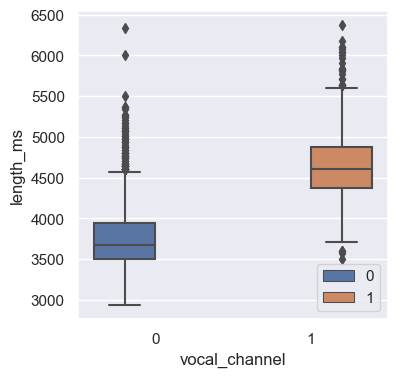

In [113]:
plt.figure(figsize=(4,4), dpi = 100 )
sns.boxplot(x="vocal_channel", y="length_ms", hue="vocal_channel", data=df)
plt.legend(loc="best")
plt.show()

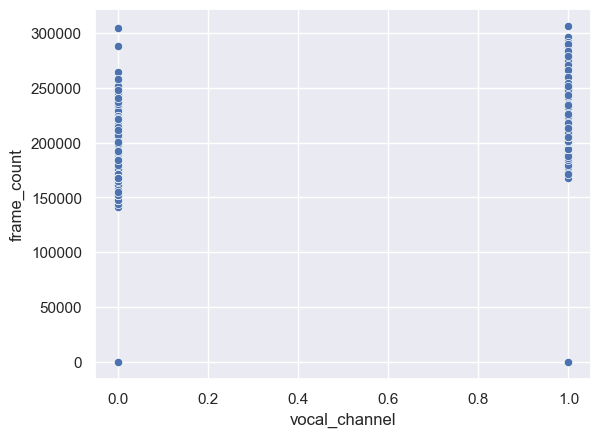

In [114]:
sns.scatterplot(y='frame_count',x='vocal_channel',data=df)
plt.show()

In [115]:
# Getting number of outliers
len(outliers(x="vocal_channel", y= "length_ms", df=df))

97

In [116]:
# Getting index of outliers
ix1 = set(outliers(x="vocal_channel", y="length_ms", df=df).index)
print(ix1)

{2, 1543, 1034, 1044, 1562, 1062, 42, 43, 1581, 48, 2098, 564, 1591, 569, 61, 2114, 71, 1100, 1617, 595, 87, 1631, 616, 1640, 2158, 1148, 129, 1680, 153, 2204, 2210, 1699, 679, 2216, 175, 1719, 1723, 700, 2236, 2241, 1730, 712, 2249, 205, 2253, 719, 2262, 2263, 739, 2275, 742, 744, 238, 1777, 250, 1791, 1279, 262, 1799, 1802, 1292, 2323, 1320, 813, 815, 1330, 1335, 1338, 843, 846, 1881, 1378, 359, 1385, 1389, 1397, 1914, 383, 1920, 1922, 2446, 2447, 403, 1428, 1435, 1438, 932, 428, 435, 436, 1461, 959, 1471, 2024, 2031, 1524, 1527}


In [117]:
# Dropping method for rows
# new_df.drop(ix1, axis=0)

##  Getting Outliers for "emotion" and "mfcc_min"

In [118]:
x = "emotion"
y = "mfcc_min"

In [119]:
# Outliers detected for "mfcc_min" and "emotion"

# Function to get percentiles and Imin, Imax, IQR of the selected attribute
Q1 = df[y].groupby(df[x]).describe()[["25%"]]
Q3 = df[y].groupby(df[x]).describe()[["75%"]]

IQR = pd.DataFrame([(Q3.iloc[0][0] - Q1.iloc[0][0]), (Q3.iloc[1][0] - Q1.iloc[1][0]),
                   (Q3.iloc[2][0] - Q1.iloc[2][0]), (Q3.iloc[3][0] - Q1.iloc[3][0]),
                   (Q3.iloc[4][0] - Q1.iloc[4][0]), (Q3.iloc[5][0] - Q1.iloc[5][0]), 
                   (Q3.iloc[6][0] - Q1.iloc[6][0]), (Q3.iloc[7][0] - Q1.iloc[7][0])], 
                   columns=["IQR"])

Imin =pd.DataFrame([(Q1.iloc[0][0] - (1.5 * IQR.iloc[0][0])), (Q1.iloc[1][0] - (1.5 * IQR.iloc[1][0])),
                   (Q1.iloc[2][0] - (1.5 * IQR.iloc[2][0])), (Q1.iloc[3][0] - (1.5 * IQR.iloc[3][0])),
                   (Q1.iloc[4][0] - (1.5 * IQR.iloc[4][0])), (Q1.iloc[5][0] - (1.5 * IQR.iloc[5][0])),
                   (Q1.iloc[6][0] - (1.5 * IQR.iloc[6][0])), (Q1.iloc[7][0] - (1.5 * IQR.iloc[7][0]))], 
                   columns=["Imin"])

Imax =pd.DataFrame([(Q3.iloc[0][0] + (1.5 * IQR.iloc[0][0])), (Q3.iloc[1][0] + (1.5 * IQR.iloc[1][0])),
                   (Q3.iloc[2][0] + (1.5 * IQR.iloc[2][0])), (Q3.iloc[3][0] + (1.5 * IQR.iloc[3][0])),
                   (Q3.iloc[4][0] + (1.5 * IQR.iloc[4][0])), (Q3.iloc[5][0] + (1.5 * IQR.iloc[5][0])),
                   (Q3.iloc[6][0] + (1.5 * IQR.iloc[6][0])), (Q3.iloc[7][0] + (1.5 * IQR.iloc[7][0]))], 
                   columns=["Imax"])

temp_df = pd.DataFrame(df["mfcc_min"].groupby(df["emotion"]).
                        describe(percentiles=[0.10, .25, .75, .90])[["min", "10%", "25%", "75%", "90%", "max"]])

# Imin = Imin.reset_index(drop=True)

# Imax = Imax.reset_index(drop=True)

temp_df = temp_df.reset_index(drop=True)

b_describe = pd.concat([pd.concat([Imin, temp_df], axis=1), Imax], axis=1)

# Gives the outlier based on 1 Categorical and its highly correlated 1 Continuous attribute
outlier = df[
    (
    ((df["emotion"] == 'neutral') & (df["mfcc_min"] < Imin.iloc[0][0])) | 
    ((df["emotion"] == 'calm') & (df["mfcc_min"] < Imin.iloc[1][0])) |
    ((df["emotion"] == 'happy') & (df["mfcc_min"] < Imin.iloc[2][0])) |
    ((df["emotion"] == 'sad') & (df["mfcc_min"] < Imin.iloc[3][0])) |
    ((df["emotion"] == 'angry') & (df["mfcc_min"] < Imin.iloc[4][0])) |
    ((df["emotion"] == 'fearful') & (df["mfcc_min"] < Imin.iloc[5][0])) |
    ((df["emotion"] == 'disgust') & (df["mfcc_min"] < Imin.iloc[6][0])) |
    ((df["emotion"] == 'surprised') & (df["mfcc_min"] < Imin.iloc[7][0]))
    ) | (
    ((df["emotion"] == 'neutral') & (df["mfcc_min"] > Imax.iloc[0][0])) | 
    ((df["emotion"] == 'calm') & (df["mfcc_min"] > Imax.iloc[1][0])) |
    ((df["emotion"] == 'happy') & (df["mfcc_min"] > Imax.iloc[2][0])) |
    ((df["emotion"] == 'sad') & (df["mfcc_min"] > Imax.iloc[3][0])) |
    ((df["emotion"] == 'angry') & (df["mfcc_min"] > Imax.iloc[4][0])) |
    ((df["emotion"] == 'fearful') & (df["mfcc_min"] > Imax.iloc[5][0])) |
    ((df["emotion"] == 'disgust') & (df["mfcc_min"] > Imax.iloc[6][0])) |
    ((df["emotion"] == 'surprised') & (df["mfcc_min"] > Imax.iloc[7][0]))
    )
][["emotion", "mfcc_min"]]

In [120]:
# box_describe
b_describe

Imin         min         10%         25%         75%         90%  \
0 -1013.041369  -974.01575 -907.978902 -872.939985 -779.539062 -734.648226   
1 -1062.382613 -1068.11570 -950.814485 -896.889750 -786.561175 -744.874435   
2  -934.289363  -921.68500 -831.577780 -777.125295 -672.349250 -626.679450   
3 -1007.095275 -1085.47970 -907.079100 -850.275015 -745.728175 -688.586620   
4  -903.336862  -929.43850 -758.735565 -721.014900 -599.466925 -555.906860   
5  -948.771972 -1047.57230 -840.432000 -774.482900 -658.290185 -597.079950   
6  -969.152085  -977.51874 -893.467884 -829.842600 -736.969610 -700.279957   
7  -921.999388  -961.25854 -850.506024 -801.407975 -721.013700 -687.107180   

         max        Imax  
0 -637.58340 -639.437679  
1 -598.60516 -621.068312  
2 -518.86780 -515.185182  
3 -568.46140 -588.907915  
4 -482.95944 -417.144963  
5 -461.48932 -484.001112  
6 -611.02216 -597.660125  
7 -602.52080 -600.422288

In [121]:
# emotion_map = {'neutral':5, 'calm':1, 'happy':4, 'sad':6, 'angry':0, 'fearful':3, 'disgust':2, 'surprised':7}

In [122]:
# Outliers detected for "emotion" and "mfcc_min"
outlier

Empty DataFrame
Columns: [emotion, mfcc_min]
Index: []

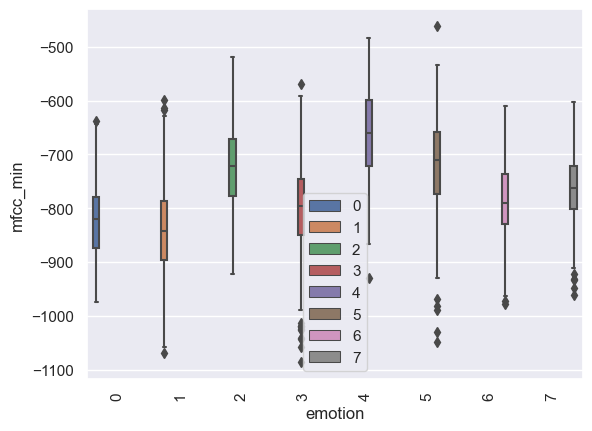

In [123]:
sns.boxplot(x="emotion", y="mfcc_min", hue="emotion", data=df)
plt.xticks(rotation =90)
plt.legend(loc="best")
plt.show()

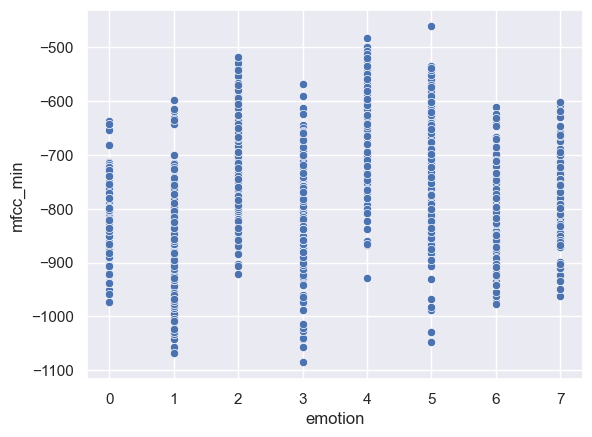

In [124]:
sns.scatterplot(x="emotion", y="mfcc_min", data=df)
plt.show()

In [125]:
# Getting number of outliers
len(outlier)

0

In [126]:
# Getting index of outliers
ix2= set(outlier.index)
print(ix2)

set()


## Getting Outliers for "emotional_intensity" and "max"

In [127]:
# box_describe
box_describe(x="emotional_intensity", y="max", df=df)

Imin  min       10%       25%       75%       90%       max      Imax
0 -0.087288 -1.0  158558.0  166567.0  188989.0  205005.0  304304.0  0.268547
1 -0.327286 -1.0  198599.0  208208.0  233833.0  249850.0  305906.0  0.772934

In [128]:
# emotional_intensity_map = {"normal": 0, "strong": 1}

In [129]:
# Outliers detected for "vocal_channel" and "frame_count"
outliers(x="emotional_intensity", y="max", df=df)

emotional_intensity       max
101                     1  0.998810
113                     1  0.776031
114                     1  0.913086
131                     0  0.854980
161                     1  0.817688
...                   ...       ...
2397                    0  0.351898
2405                    1  0.832733
2414                    0  0.458282
2417                    1  0.944336
2423                    1  0.997101

[137 rows x 2 columns]

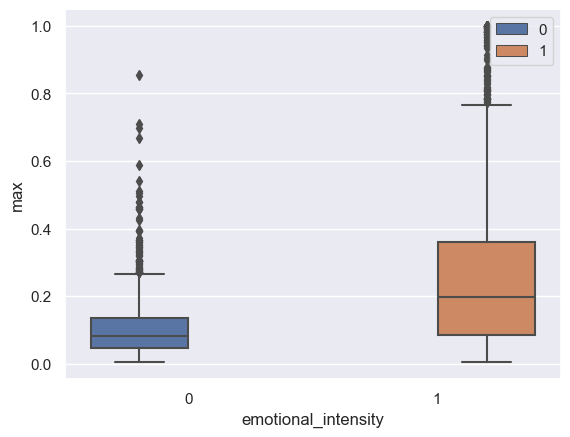

In [130]:
sns.boxplot(x="emotional_intensity", y="max", hue="emotional_intensity", data=df)
plt.legend(loc="best")
plt.show()

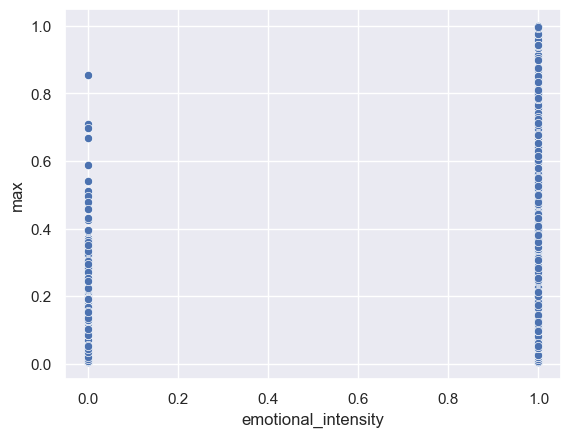

In [131]:
sns.scatterplot(x="emotional_intensity", y="max", data=df)
plt.show()

In [132]:
# Getting number of outliers
len(outliers(x="emotional_intensity", y="max", df=df))

137

In [133]:
# Getting index of outliers
ix3 = set(outliers(x="emotional_intensity", y="max", df=df).index)
print(ix3)

{1538, 1029, 2054, 1545, 527, 531, 1557, 1558, 1052, 1564, 542, 543, 547, 1070, 561, 1076, 1079, 1095, 591, 2132, 598, 2137, 1632, 2146, 101, 1126, 113, 114, 625, 1652, 2161, 630, 642, 131, 2182, 1159, 652, 1169, 1686, 2201, 1178, 161, 1186, 1187, 167, 1192, 684, 174, 2222, 2226, 1208, 704, 1729, 1732, 1746, 1747, 728, 1240, 2270, 742, 2281, 2284, 2287, 249, 762, 251, 2301, 768, 1282, 1800, 269, 270, 1300, 1814, 1304, 793, 1823, 801, 803, 292, 1315, 2345, 1834, 2347, 2355, 823, 1337, 1850, 321, 833, 323, 1347, 2373, 843, 1871, 1873, 339, 1363, 853, 348, 2397, 867, 1379, 357, 2405, 1386, 2414, 2417, 1908, 2423, 377, 894, 386, 388, 1422, 399, 1424, 1426, 1944, 921, 1946, 1435, 422, 1455, 953, 443, 1473, 1475, 1479, 1491, 2016, 1507, 497, 499, 2035, 1529, 1018}


## Getting Outliers for "statement" and "kur"

In [134]:
# statement_map = {"Dogs are sitting by the door": 0, "Kids are talking by the door": 1}

In [135]:
# box_describe
box_describe(x="statement", y="kur", df=df)

Imin  min       10%       25%       75%       90%       max       Imax
0 -4.215981 -1.0  158558.0  166567.0  188989.0  205005.0  304304.0  22.989624
1 -4.935407 -1.0  198599.0  208208.0  233833.0  249850.0  305906.0  27.546641

In [136]:
# Outliers detected for "vocal_channel" and "frame_count"
outliers(x="statement", y="kur", df=df)

statement        kur
40            1  28.025827
89            1  32.533053
90            1  32.791878
91            1  33.469627
101           0  28.017790
...         ...        ...
2289          1  29.900649
2346          0  25.475260
2375          1  29.341086
2439          1  30.325793
2445          0  23.292300

[80 rows x 2 columns]

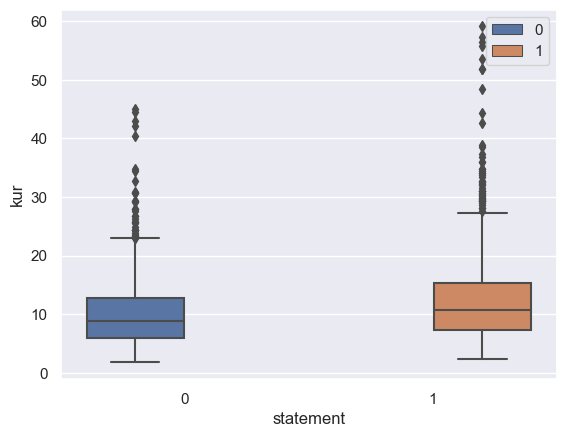

In [137]:
sns.boxplot(x="statement", y="kur", hue="statement", data=df)
plt.legend(loc="best")
plt.show()

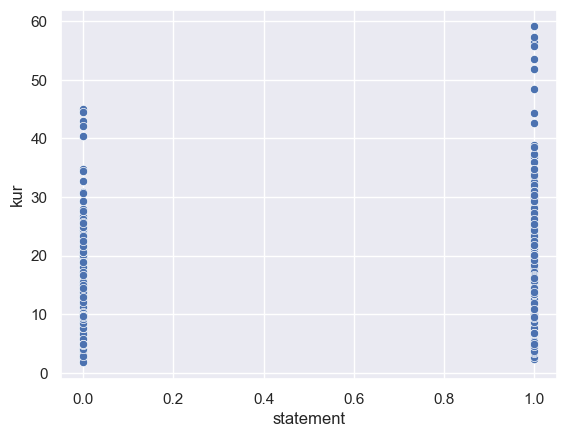

In [138]:
sns.scatterplot(x="statement", y="kur", data=df)
plt.show()

In [139]:
# Getting number of outliers
len(outliers(x="statement", y="kur", df=df))

80

In [140]:
# Getting index of outliers
ix4 = set(outliers(x="vocal_channel", y="frame_count", df=df).index)
print(ix4)

{2, 1538, 1543, 1034, 1044, 1562, 1062, 43, 1581, 2093, 48, 564, 1079, 61, 1598, 2114, 71, 1612, 1617, 87, 1631, 2150, 616, 1640, 2158, 1148, 129, 1687, 2200, 153, 2204, 670, 2210, 1699, 676, 2216, 692, 1719, 1723, 700, 2236, 2241, 1730, 2245, 712, 713, 205, 2253, 719, 1238, 1750, 2262, 1243, 739, 2275, 2276, 742, 238, 1777, 1279, 1791, 1799, 2311, 1802, 1292, 1295, 272, 2323, 1305, 1320, 300, 813, 1839, 1330, 1335, 836, 1881, 1378, 869, 1385, 1389, 1400, 1914, 894, 383, 1920, 1922, 1414, 2446, 403, 1427, 1428, 1435, 1438, 932, 428, 435, 436, 959, 1471, 1473, 455, 458, 2031, 1009, 1524, 1527, 2043}


## Getting Outliers for "repetition" and "frame_count"

In [141]:
# box_describe
box_describe(x="repetition", y="frame_count", df=df)

Imin  min       10%       25%       75%       90%       max      Imax
0  104106.0 -1.0  158558.0  166567.0  188989.0  205005.0  304304.0  283482.0
1  105705.5 -1.0  198599.0  208208.0  233833.0  249850.0  305906.0  285085.5

In [142]:
# repetition_map = {"1st": 1, "2nd": 0}

In [143]:
# df[df["frame_count"]== -1.0]

In [144]:
# Outliers detected for "vocal_channel" and "frame_count"
outliers(x="repetition", y="frame_count", df=df)

repetition  frame_count
61             0     305906.0
272            1         -1.0
300            0         -1.0
435            0     293093.0
455            0         -1.0
458            0         -1.0
670            0         -1.0
676            0         -1.0
692            0         -1.0
713            0         -1.0
739            1     288288.0
836            0         -1.0
869            0         -1.0
894            1         -1.0
959            1     293093.0
1009           1         -1.0
1034           0         -1.0
1079           1         -1.0
1238           0         -1.0
1243           1         -1.0
1292           1     296296.0
1295           0         -1.0
1305           0         -1.0
1400           1         -1.0
1414           1         -1.0
1427           1         -1.0
1438           1     304304.0
1473           1         -1.0
1538           1         -1.0
1598           0         -1.0
1612           1         -1.0
1617           1     291492.0
1687           0         -1.0
1750           0         -1.0
1777           1     289889.0
1791           1     286687.0
1839           1         -1.0
1922           0     288288.0
2043           0         -1.0
2093           0         -1.0
2150           1         -1.0
2158           1     289890.0
2200           0         -1.0
2245           0         -1.0
2276           0         -1.0
2311           1         -1.0

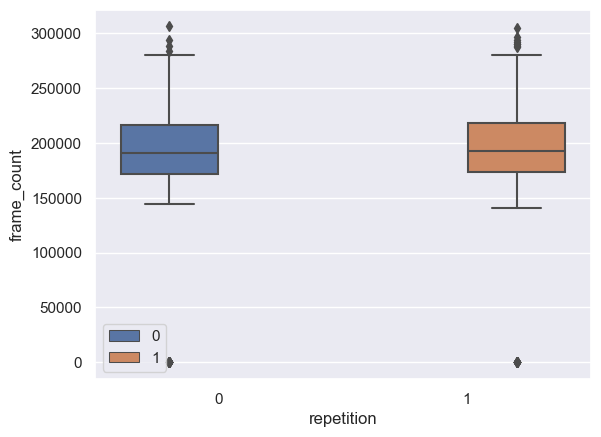

In [145]:
sns.boxplot(x="repetition", y="frame_count", hue="repetition", data=df)
plt.legend(loc="best")
plt.show()

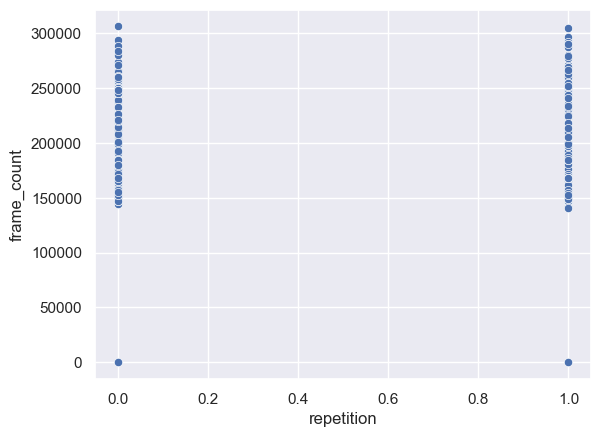

In [146]:
sns.scatterplot(x="repetition", y="frame_count",data=df)
plt.show()

In [147]:
# Getting number of outliers
len(outliers(x="repetition", y="frame_count", df=df))

46

In [148]:
# Getting index of outliers
ix5 = set(outliers(x="repetition", y="frame_count", df=df).index)
print(ix5)

{1538, 1922, 1414, 2311, 1034, 1292, 1295, 272, 1427, 1687, 2200, 1305, 670, 1438, 676, 300, 2093, 1839, 435, 692, 1079, 61, 1598, 959, 1473, 836, 2245, 455, 713, 458, 1612, 1617, 1238, 1750, 1243, 739, 2276, 869, 2150, 2158, 1009, 1777, 1400, 2043, 894, 1791}


## Getting Outliers for "sex" and "stft_std"

In [149]:
# box_describe
box_describe(x="sex", y="stft_std", df=df)

Imin  min       10%       25%       75%       90%       max      Imax
0  0.254255 -1.0  158558.0  166567.0  188989.0  205005.0  304304.0  0.382751
1  0.300767 -1.0  198599.0  208208.0  233833.0  249850.0  305906.0  0.390114

In [150]:
# sex_map = {"M": 1, "F": 0}

In [151]:
# Outliers detected for "vocal_channel" and "frame_count"
outliers(x="sex", y="stft_std", df=df)

sex  stft_std
73      0  0.298425
84      0  0.300165
85      0  0.286014
89      0  0.286984
91      0  0.293228
...   ...       ...
2422    0  0.281628
2424    0  0.295457
2438    0  0.284046
2439    0  0.292172
2444    0  0.280072

[294 rows x 2 columns]

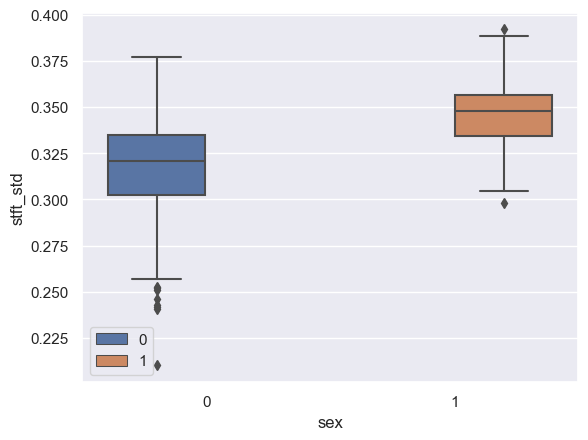

In [152]:
sns.boxplot(x="sex", y="stft_std", hue="sex", data=df)
plt.legend(loc="best")
plt.show()

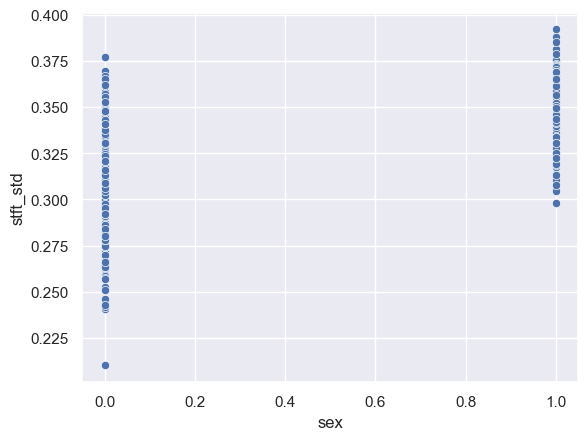

In [153]:
sns.scatterplot(x="sex", y="stft_std",data=df)
plt.show()

In [154]:
# Getting number of outliers
len(outliers(x="sex", y="stft_std", df=df))

# sex attribute has just 10 outliers, so doesnt matter

294

In [155]:
# Getting index of outliers
ix6 = set(outliers(x="sex", y="stft_std", df=df).index)
print(ix6)

{512, 1025, 1026, 515, 516, 1539, 1540, 1031, 1528, 1541, 1545, 1035, 1020, 1036, 1546, 1039, 1040, 1041, 1042, 1547, 1548, 1551, 1046, 535, 536, 1047, 1049, 1556, 1563, 1564, 1565, 2074, 2075, 1059, 1060, 1061, 1571, 1572, 1064, 1065, 1066, 1579, 2085, 2086, 1582, 1583, 2090, 2098, 2099, 2101, 1078, 2102, 1083, 1085, 2109, 1087, 2113, 1090, 2117, 2118, 2119, 2120, 73, 2124, 2126, 84, 85, 1108, 2136, 89, 91, 2141, 2143, 97, 1123, 1125, 1126, 2151, 104, 105, 2154, 107, 1131, 2156, 2159, 112, 1138, 1139, 116, 2162, 2166, 119, 120, 2167, 2168, 123, 124, 125, 126, 2169, 2173, 1552, 130, 2175, 132, 135, 136, 2188, 142, 2191, 144, 145, 2192, 2195, 148, 149, 150, 2197, 153, 163, 2211, 2068, 2212, 2214, 168, 169, 171, 2219, 175, 2224, 2231, 2232, 186, 187, 191, 708, 199, 712, 715, 717, 1229, 207, 209, 210, 1233, 1234, 215, 216, 1239, 1243, 1244, 1245, 1246, 223, 736, 226, 1763, 741, 1253, 743, 748, 749, 751, 1775, 753, 1266, 756, 1782, 761, 1786, 1787, 766, 1793, 770, 771, 1797, 1799, 1288, 77

## Removing the outliers finally

In [156]:
# Checking common index among all outliers found
set.intersection(ix1, ix2, ix3, ix4, ix5, ix6)

set()

In [157]:
# Ouliers Common between 'vocal_channel','statement','repetition' found by correlation
out1 = set.intersection(ix1, ix4, ix5)

In [158]:
# Ouliers Common between 'emotion','emotional_intensity' found by correlation
out2 = set.intersection(ix2, ix3)

In [159]:
# Ouliers Common between 'emotion','emotional_intensity' found by correlation
out3 = (set.intersection(ix4, ix3))

In [160]:
# Ouliers Common between 'repetition','vocal_channel' found by correlation
out4 = set.intersection(ix5, ix1)

In [161]:
total_outliers_ix = [out1, out2, out3, out4]

In [162]:
total_outliers_ix

[{61, 435, 739, 959, 1034, 1292, 1438, 1617, 1777, 1791, 1922, 2158},
 set(),
 {742, 894, 1079, 1435, 1473, 1538},
 {61, 435, 739, 959, 1034, 1292, 1438, 1617, 1777, 1791, 1922, 2158}]

In [163]:
new_df = df.copy()

In [164]:
remove_ix = []
for x in (total_outliers_ix):
    for y in x:
        remove_ix.append(y)


In [165]:
# Finally got the most common outliers
final_out_ix = set(sorted(remove_ix))

In [166]:
# Dropping 77 Outliers found most common
new_df.drop(labels = final_out_ix, axis=0)

vocal_channel  emotion  emotional_intensity  statement  repetition  sex  \
0                 0        5                    0          0           1    1   
1                 0        4                    0          0           0    1   
2                 0        2                    1          0           1    1   
3                 0        7                    0          1           0    1   
4                 1        2                    1          0           1    1   
...             ...      ...                  ...        ...         ...  ...   
2447              0        1                    1          1           0    0   
2448              0        1                    0          0           0    0   
2449              1        3                    1          0           1    0   
2450              0        7                    0          1           0    0   
2451              0        0                    0          0           1    0   

      length_ms  frame_count  intensity  zero_crossings_sum  ...  stft_std  \
0          3737     179379.0 -36.793432               16995  ...  0.335533   
1          3904     187387.0 -36.663681               13906  ...  0.352380   
2          4671     224224.0 -32.290737               18723  ...  0.352270   
3          3637     174575.0 -49.019839               11617  ...  0.360552   
4          4404     211411.0 -31.214503               15137  ...  0.350655   
...         ...          ...        ...                 ...  ...       ...   
2447       4605     221021.0 -47.596807                9871  ...  0.304496   
2448       4171     200200.0 -43.342901                8963  ...  0.306333   
2449       5239     251451.0 -36.772456                9765  ...  0.347843   
2450       3737     179379.0 -45.751265                9716  ...  0.308684   
2451       3837     184184.0 -40.018044                9427  ...  0.320787   

      stft_min  stft_kur  stft_skew          mean       std       min  \
0     0.000000 -1.215025   0.403514  3.844916e-07  0.014482 -0.128632   
1     0.000000 -1.384174   0.290905 -7.149491e-08  0.020417 -0.305725   
2     0.000000 -1.242947   0.470350  2.429985e-06  0.024317 -0.137482   
3     0.000000 -1.445318   0.274756  2.373929e-07  0.003561 -0.027374   
4     0.000000 -1.366742   0.318926  8.454691e-07  0.027522 -0.192169   
...        ...       ...        ...           ...       ...       ...   
2447  0.000000 -1.075888  -0.310088  9.367040e-07  0.005260 -0.039856   
2448  0.000000 -1.026071  -0.408018  4.614221e-07  0.006836 -0.064178   
2449  0.000000 -1.473789   0.130310 -8.219263e-06  0.015384 -0.093079   
2450  0.001565 -1.277117  -0.242668 -4.400898e-06  0.005182 -0.057556   
2451  0.000000 -1.257666  -0.237757  6.342640e-07  0.010001 -0.081512   

           max        kur      skew  
0     0.138947   9.406061  0.273153  
1     0.263062  19.564187  0.292157  
2     0.166351   4.881241  0.302659  
3     0.024078  13.040259 -0.081014  
4     0.242676   7.485109  0.414872  
...        ...        ...       ...  
2447  0.052399   9.551363  0.759247  
2448  0.084045  22.517991  1.073633  
2449  0.097260   4.964319 -0.005821  
2450  0.052002  13.855588 -0.110966  
2451  0.103027  12.973181  1.032081  

[2434 rows x 31 columns]

<AxesSubplot:title={'center':'skew'}, ylabel='Frequency'>

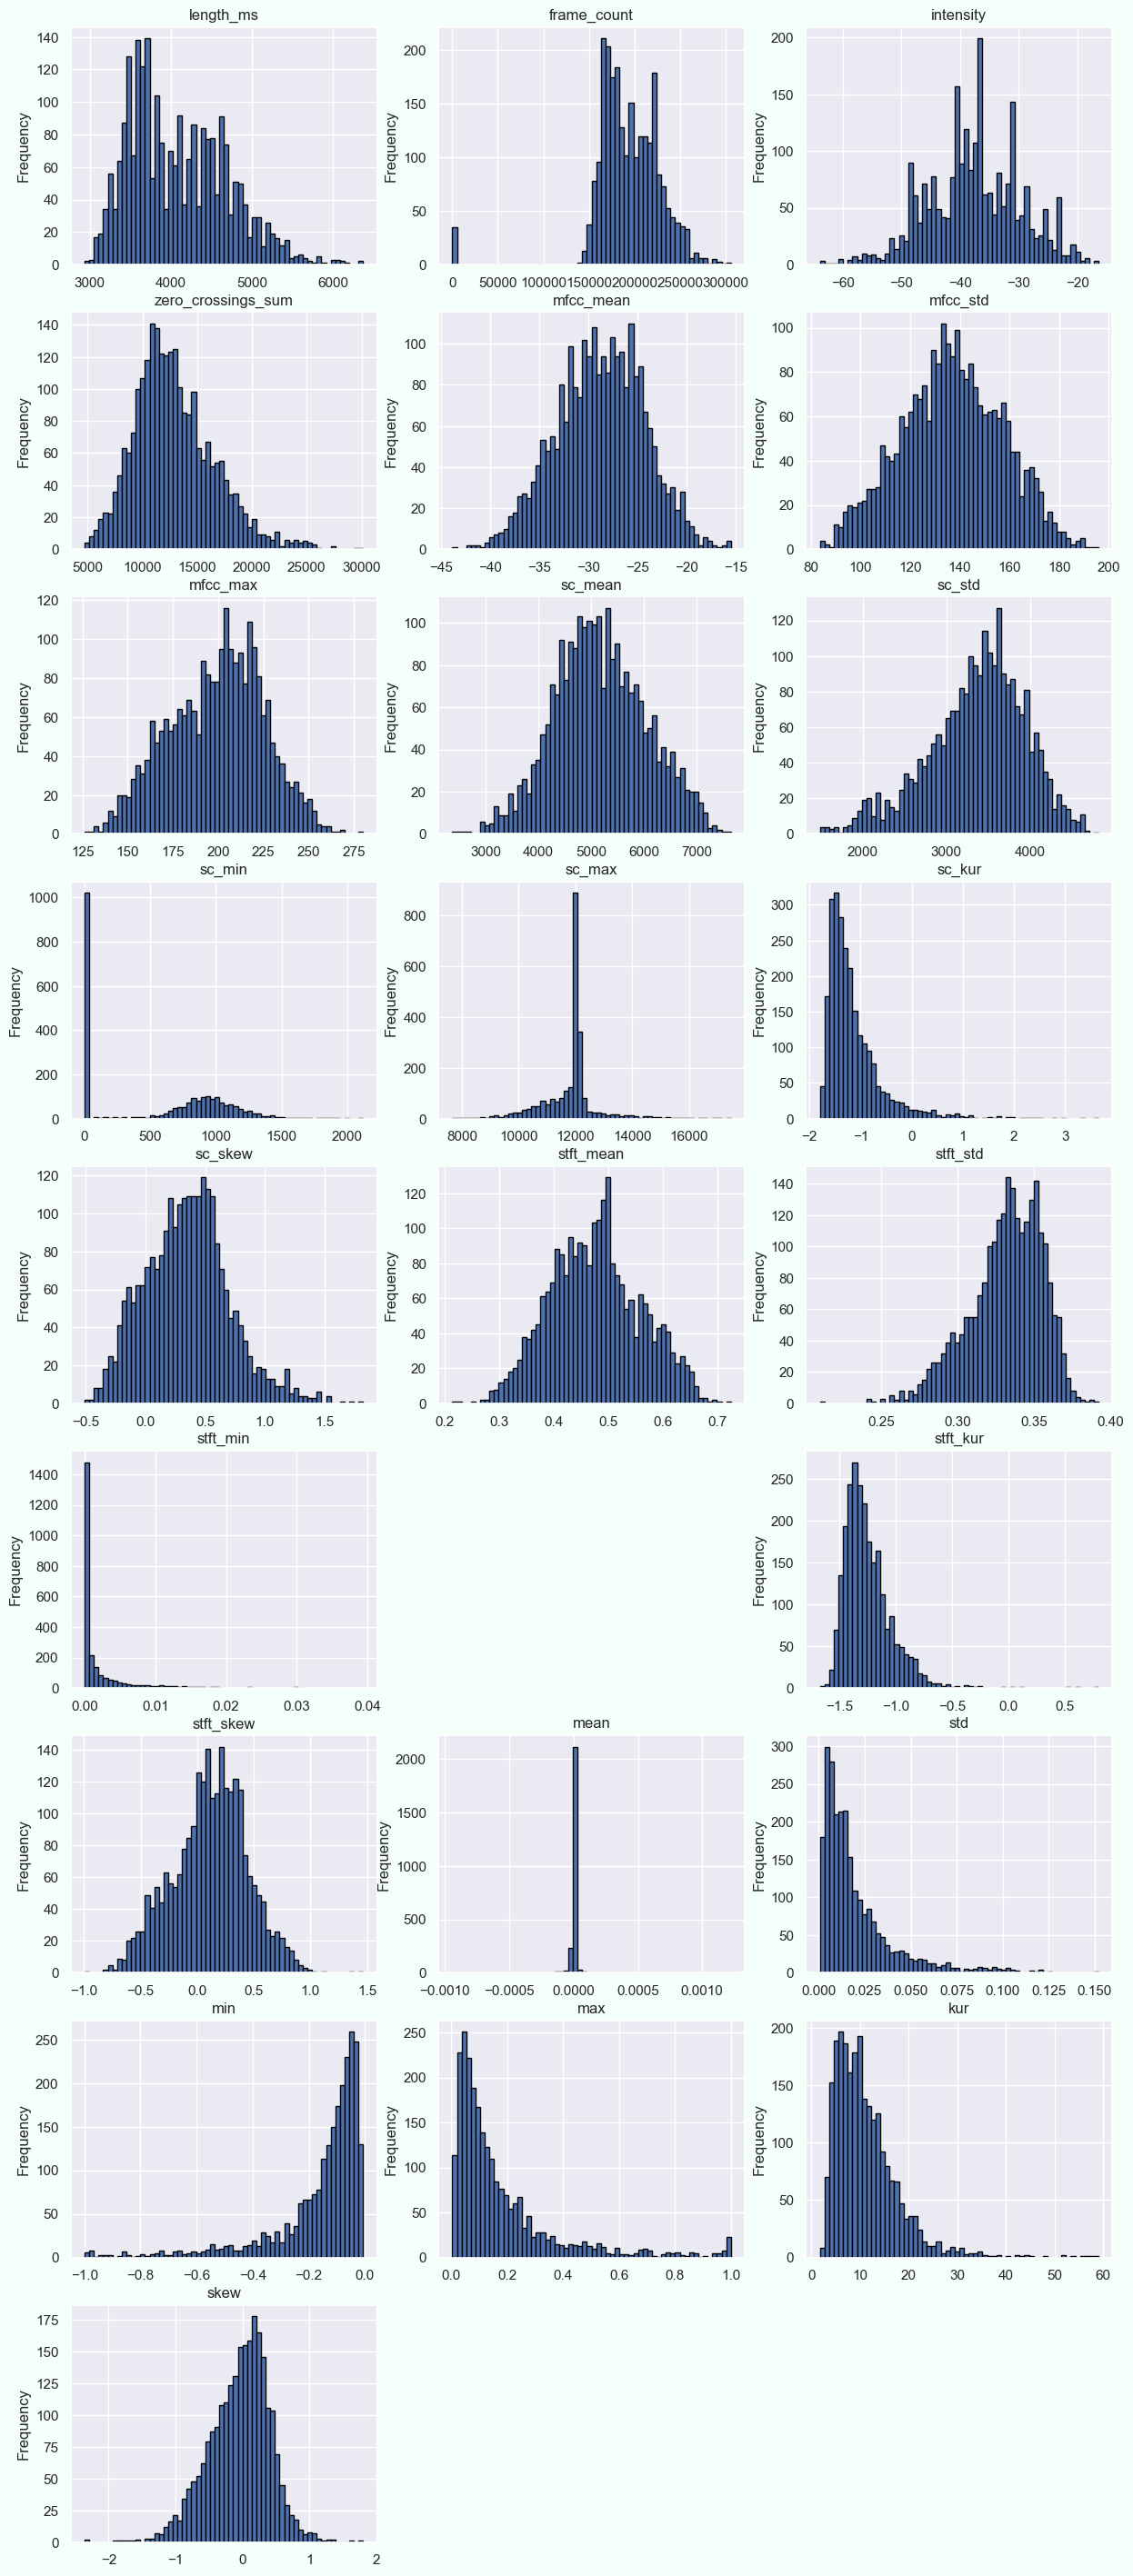

In [167]:
# Histogram of all numerical attributes

df_no_str = df[plot_num_cols]
fig = plt.figure(figsize=(20, 40), edgecolor = "black",facecolor='mintcream') 
fig_dims = (10, 4)

# plt.subplot2grid(fig_dims, (0, 0))
# df["actor"].plot.hist(title = "actor", edgecolor = "black", bins = 60 )
    
# plt.subplot2grid(fig_dims, (0, 1))
# df['sample_width'].plot.hist(title = 'sample_width', edgecolor = "black", bins = 60 )

# plt.subplot2grid(fig_dims, (0, 2))
# df['frame_rate'].plot.hist(title = 'frame_rate', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (1, 0))
df["length_ms"].plot.hist(title = "length_ms", edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (1, 1))
df['frame_count'].plot.hist(title = 'frame_count', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (1, 2))
df['intensity'].plot.hist(title = 'intensity', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (2, 0))
df['zero_crossings_sum'].plot.hist(title = 'zero_crossings_sum', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (2, 1))
df['mfcc_mean'].plot.hist(title = 'mfcc_mean', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (2, 2))
df['mfcc_std'].plot.hist(title = 'mfcc_std', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (3, 0))
df['mfcc_max'].plot.hist(title = 'mfcc_max', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (3, 1))
df['sc_mean'].plot.hist(title = 'sc_mean', edgecolor = "black", bins = 60 )
    
plt.subplot2grid(fig_dims, (3, 2))
df['sc_std'].plot.hist(title = 'sc_std', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (4, 0))
df['sc_min'].plot.hist(title = 'sc_min', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (4, 1))
df['sc_max'].plot.hist(title = 'sc_max', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (4, 2))
df['sc_kur'].plot.hist(title = 'sc_kur', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (5, 0))
df['sc_skew'].plot.hist(title = 'sc_skew', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (5, 1))
df['stft_mean'].plot.hist(title = 'stft_mean', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (5, 2))
df['stft_std'].plot.hist(title = 'stft_std', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (6, 0))
df['stft_min'].plot.hist(title = 'stft_min', edgecolor = "black", bins = 60 )

# plt.subplot2grid(fig_dims, (6, 1))
# df['stft_max'].plot.box(title = 'stft_max', edgecolor = "black", bins = 60 )  
                          
plt.subplot2grid(fig_dims, (6, 2))
df["stft_kur"].plot.hist(title = "stft_kur", edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (7, 0))
df['stft_skew'].plot.hist(title = 'stft_skew', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (7, 1))
df['mean'].plot.hist(title = 'mean', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (7, 2))
df['std'].plot.hist(title = 'std', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (8, 0))
df['min'].plot.hist(title = 'min', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (8, 1))
df['max'].plot.hist(title = 'max', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (8, 2))
df['kur'].plot.hist(title = 'kur', edgecolor = "black", bins = 60 )

plt.subplot2grid(fig_dims, (9, 0))
df['skew'].plot.hist(title = 'skew', edgecolor = "black", bins = 60 ) 
                          
                        

<AxesSubplot:title={'center':'zero_crossings_sum'}>

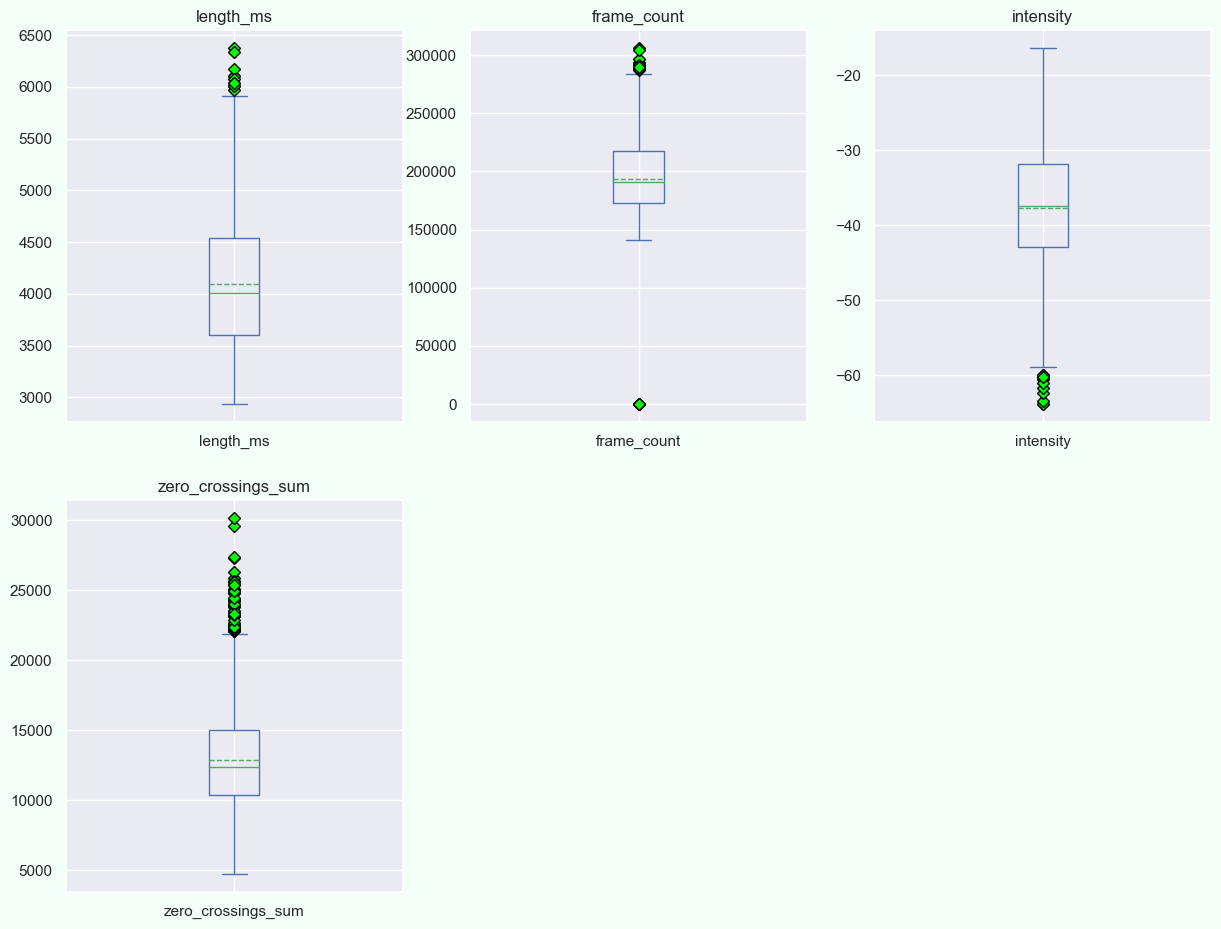

In [168]:

df_no_str = df[plot_num_cols]
green_diamond = dict(markerfacecolor='lime', marker='D')

fig = plt.figure(figsize=(20, 60), edgecolor = "black",facecolor='mintcream') 
fig_dims = (10, 4)

plt.subplot2grid(fig_dims, (1, 0))
df["length_ms"].plot.box(title = "length_ms",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 1))
df['frame_count'].plot.box(title = 'frame_count',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 2))
df['intensity'].plot.box(title = 'intensity',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 0))
df['zero_crossings_sum'].plot.box(title = 'zero_crossings_sum',showmeans = True, meanline = True,flierprops=green_diamond)


<AxesSubplot:title={'center':'skew'}>

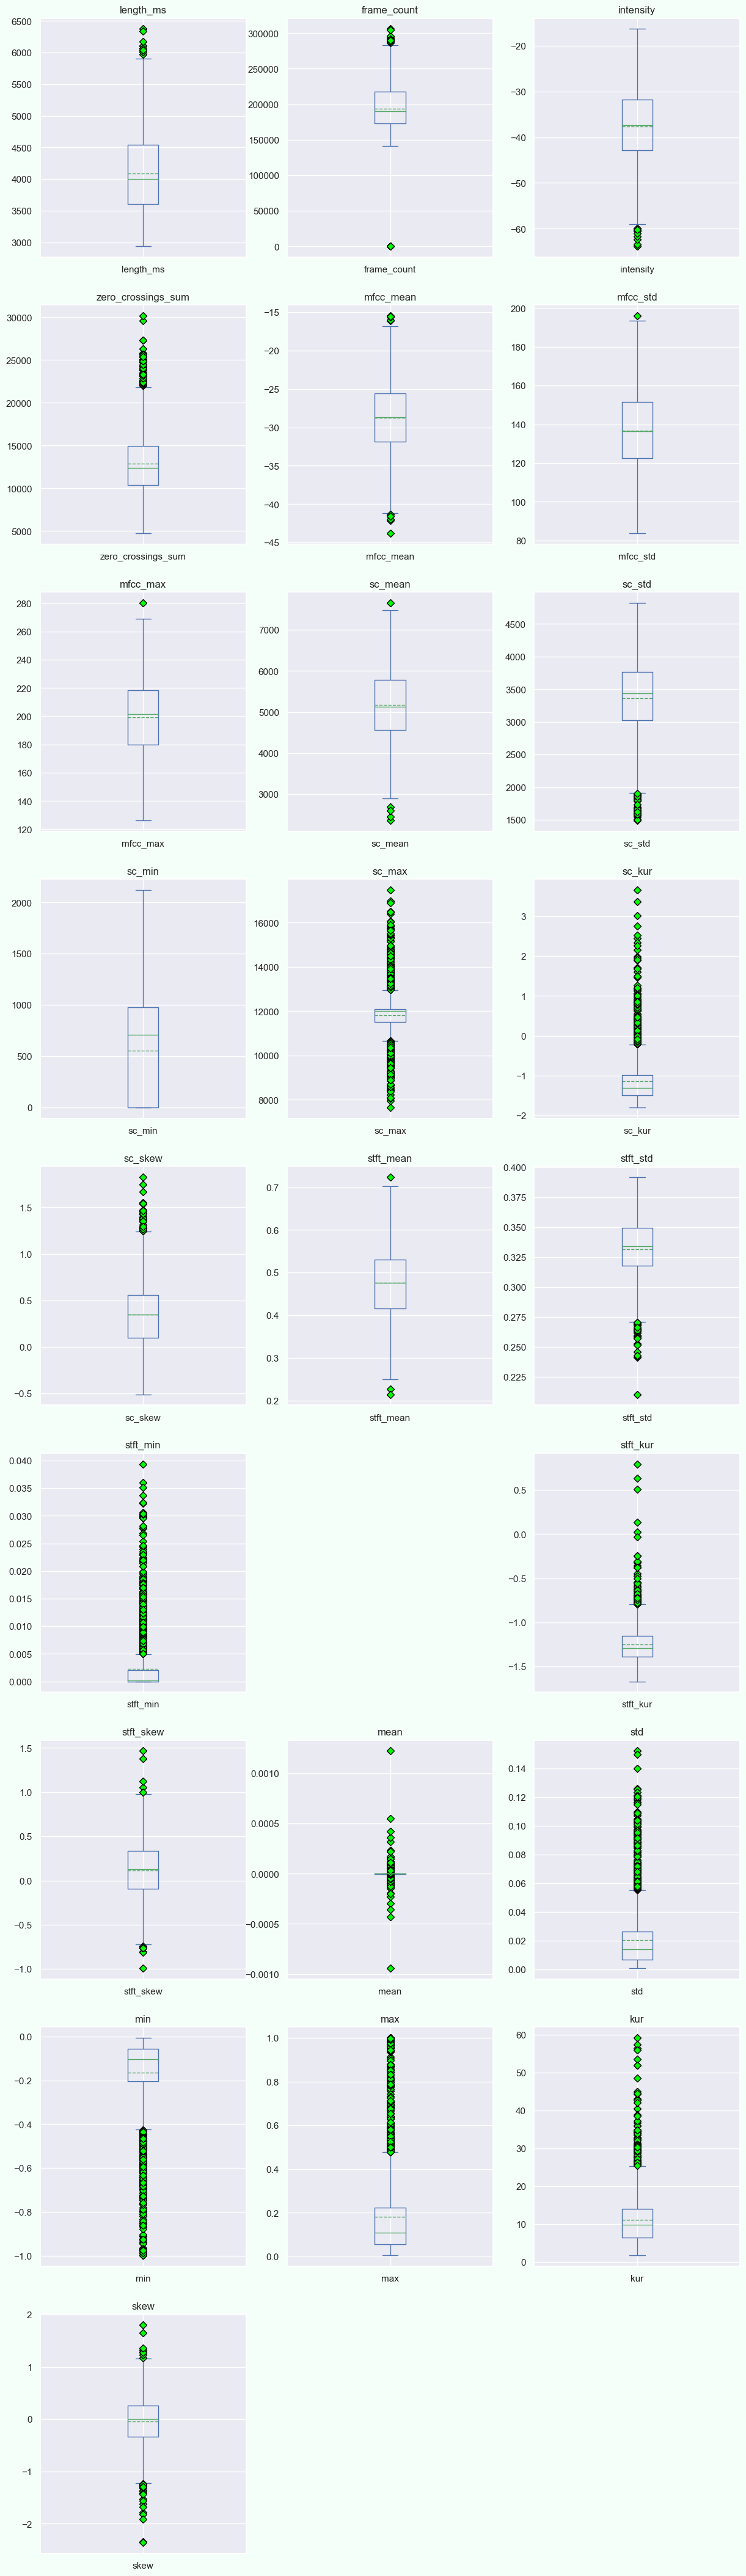

In [169]:
# Boxplot of all numerical attributes
#Istogrammi di tutti gli attributi numerici

df_no_str = df[plot_num_cols]
green_diamond = dict(markerfacecolor='lime', marker='D')

fig = plt.figure(figsize=(20, 60), edgecolor = "black",facecolor='mintcream') 
fig_dims = (10, 4)

# plt.subplot2grid(fig_dims, (0, 0))
# df["actor"].plot.box(title = "actor",showmeans = True, meanline = True,flierprops=green_diamond)
    
# plt.subplot2grid(fig_dims, (0, 1))
# df['sample_width'].plot.box(title = 'sample_width',showmeans = True, meanline = True,flierprops=green_diamond)

# plt.subplot2grid(fig_dims, (0, 2))
# df['frame_rate'].plot.box(title = 'frame_rate',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 0))
df["length_ms"].plot.box(title = "length_ms",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 1))
df['frame_count'].plot.box(title = 'frame_count',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 2))
df['intensity'].plot.box(title = 'intensity',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 0))
df['zero_crossings_sum'].plot.box(title = 'zero_crossings_sum',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 1))
df['mfcc_mean'].plot.box(title = 'mfcc_mean',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 2))
df['mfcc_std'].plot.box(title = 'mfcc_std',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (3, 0))
df['mfcc_max'].plot.box(title = 'mfcc_max',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (3, 1))
df['sc_mean'].plot.box(title = 'sc_mean',showmeans = True, meanline = True,flierprops=green_diamond)
    
plt.subplot2grid(fig_dims, (3, 2))
df['sc_std'].plot.box(title = 'sc_std',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (4, 0))
df['sc_min'].plot.box(title = 'sc_min',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (4, 1))
df['sc_max'].plot.box(title = 'sc_max',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (4, 2))
df['sc_kur'].plot.box(title = 'sc_kur',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (5, 0))
df['sc_skew'].plot.box(title = 'sc_skew',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (5, 1))
df['stft_mean'].plot.box(title = 'stft_mean',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (5, 2))
df['stft_std'].plot.box(title = 'stft_std',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (6, 0))
df['stft_min'].plot.box(title = 'stft_min',showmeans = True, meanline = True,flierprops=green_diamond)

# plt.subplot2grid(fig_dims, (6, 1))
# df['stft_max'].plot.box(title = 'stft_max',showmeans = True, meanline = True,flierprops=green_diamond)  
                          
plt.subplot2grid(fig_dims, (6, 2))
df["stft_kur"].plot.box(title = "stft_kur",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (7, 0))
df['stft_skew'].plot.box(title = 'stft_skew',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (7, 1))
df['mean'].plot.box(title = 'mean',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (7, 2))
df['std'].plot.box(title = 'std',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (8, 0))
df['min'].plot.box(title = 'min',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (8, 1))
df['max'].plot.box(title = 'max',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (8, 2))
df['kur'].plot.box(title = 'kur',showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (9, 0))
df['skew'].plot.box(title = 'skew',showmeans = True, meanline = True,flierprops=green_diamond)  
                          
                        

In [170]:
# Converting Categorical Attributes to Numeric Values

statement_map = {"Dogs are sitting by the door": 0, "Kids are talking by the door": 1}

emotional_intensity_map = {"normal": 0, "strong": 1}

emotion_map = {'neutral':0, 'calm':1, 'happy':2, 'sad':3, 'angry':4, 'fearful':5, 'disgust':6, 'surprised':7}

modality_map = {"audio-only": 0}

repetition_map = {"1st": 0, "2nd": 1}

vocal_channel_map = {"speech": 0, "song": 1}

sex_map = {"M": 0, "F": 1}

df.replace({"sex": sex_map, "emotional_intensity": emotional_intensity_map, 
            "vocal_channel": vocal_channel_map, "repetition": repetition_map, 
           "statement": statement_map, "modality": modality_map, "emotion": emotion_map}, inplace=True)

new_df.replace({"sex": sex_map, "emotional_intensity": emotional_intensity_map, 
            "vocal_channel": vocal_channel_map, "repetition": repetition_map, 
           "statement": statement_map, "modality": modality_map, "emotion": emotion_map}, inplace=True)

In [171]:
# Distribution on the basis of skewness value:

# Skewness = 0: Then normally distributed.
# Skewness > 0: Then more weight in the left tail of the distribution.
# Skewness < 0: Then more weight in the right tail of the distribution.
# Kurtosis:
# It is also a statistical term and an important characteristic of frequency distribution. 
# It determines whether a distribution is heavy-tailed in respect of the normal distribution. 
# It provides information about the shape of a frequency distribution.

# kurtosis for normal distribution is equal to 3.
# For a distribution having kurtosis < 3: It is called playkurtic.
# For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it 
# tries to produce more outliers rather than the normal distribution.

## Skew and kurtosis before removing missing values and outliers.

In [172]:
# print("skew with outliers: {}".format(a['vocal_channel'].astype(float).skew()))
# print("kurtosis with outliers: {}".format(a['vocal_channel'].astype(float).kurt()))
# # skew with outliers: 0.514017883137549
# # kurtosis with outliers: -1.7372032502537131

## Skew and kurtosis after removing missing values and outliers.

In [173]:
# Skew and kurtosis before removing missing values and outliers.
# print("skew after removing outliers: {}".format(new_df['vocal_channel'].astype(float).skew()))
# print("kurtosis after removing outliers: {}".format(new_df['vocal_channel'].astype(float).kurt()))

# skew with outliers: 0.37361026688784127
# kurtosis with outliers: -1.862066923949672

In [174]:
# between -2 and +2
# The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order 
# to prove normal univariate distribution (George & Mallery, 2010

In [175]:

print(new_df['vocal_channel'].astype(float).skew())
print(new_df['vocal_channel'].astype(float).kurt())

0.514017883137549
-1.7372032502537131


In [176]:
# Distribution on the basis of skewness value:

# Skewness = 0: Then normally distributed.
# Skewness > 0: Then more weight in the left tail of the distribution.
# Skewness < 0: Then more weight in the right tail of the distribution.
    
# kurtosis for normal distribution is equal to 3.
# For a distribution having kurtosis < 3: It is called playkurtic.
# For a distribution having kurtosis > 3, It is called leptokurtic and 
# it signifies that it tries to produce more outliers rather than the normal 
# distribution.

## Exploratory Data Analysis

In [177]:
numeric_cols

['actor',
 'sample_width',
 'frame_rate',
 'length_ms',
 'frame_count',
 'intensity',
 'zero_crossings_sum',
 'mfcc_mean',
 'mfcc_std',
 'mfcc_min',
 'mfcc_max',
 'sc_mean',
 'sc_std',
 'sc_min',
 'sc_max',
 'sc_kur',
 'sc_skew',
 'stft_mean',
 'stft_std',
 'stft_min',
 'stft_max',
 'stft_kur',
 'stft_skew',
 'mean',
 'std',
 'min',
 'max',
 'kur',
 'skew']

In [178]:
categorical_cols

['emotion',
 'statement',
 'vocal_channel',
 'repetition',
 'sex',
 'emotional_intensity']

In [179]:
df.nunique()

vocal_channel             2
emotion                   8
emotional_intensity       2
statement                 2
repetition                2
sex                       2
length_ms                95
frame_count             158
intensity              1015
zero_crossings_sum     2176
mfcc_mean              2451
mfcc_std               2449
mfcc_min               2451
mfcc_max               2449
sc_mean                2451
sc_std                 2451
sc_min                 1431
sc_max                 2423
sc_kur                 2451
sc_skew                2451
stft_mean              2451
stft_std               2451
stft_min               1431
stft_kur               2451
stft_skew              2451
mean                   2450
std                    2451
min                    2148
max                    2166
kur                    2451
skew                   2451
dtype: int64

<AxesSubplot:xlabel='length_ms', ylabel='Count'>

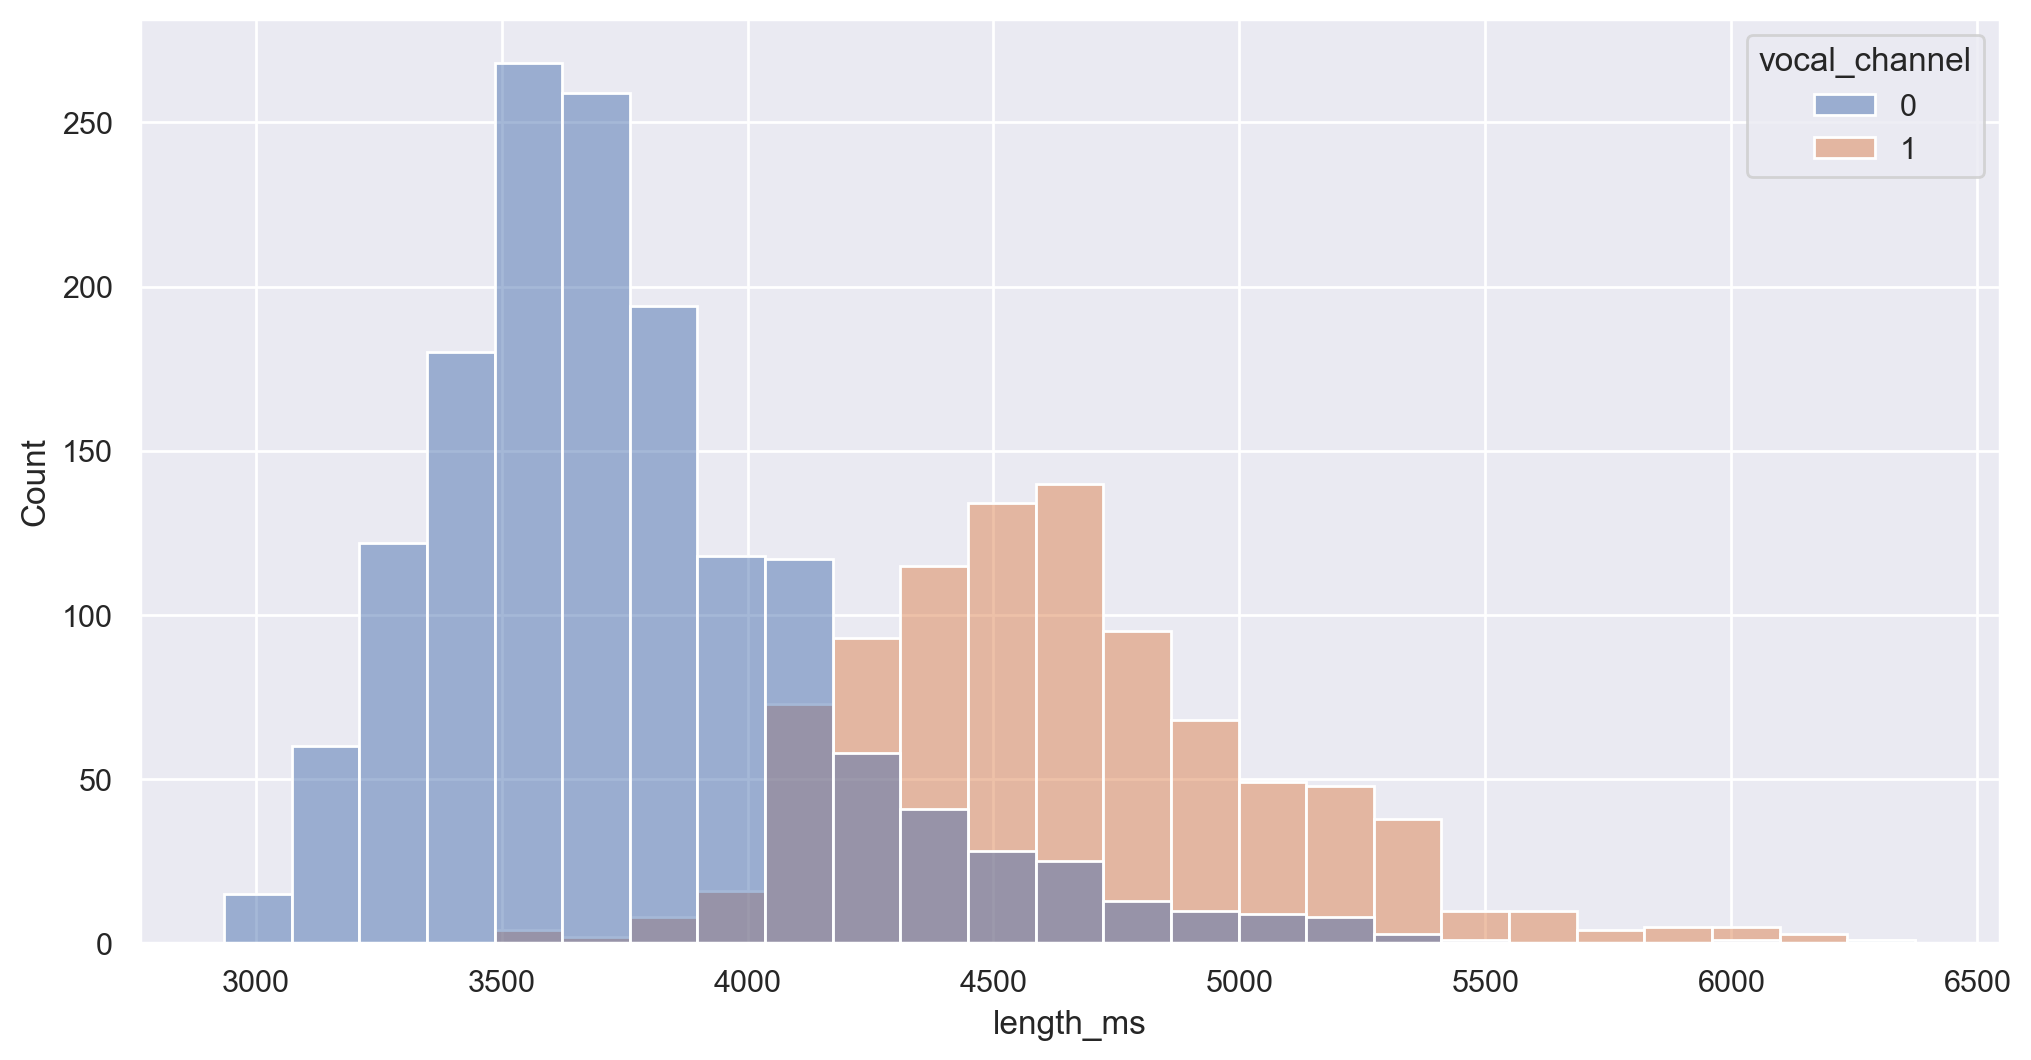

In [180]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='length_ms', hue="vocal_channel")

In [181]:
# sns.pairplot(df)

In [182]:
df.columns

Index(['vocal_channel', 'emotion', 'emotional_intensity', 'statement',
       'repetition', 'sex', 'length_ms', 'frame_count', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max',
       'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew',
       'stft_mean', 'stft_std', 'stft_min', 'stft_kur', 'stft_skew', 'mean',
       'std', 'min', 'max', 'kur', 'skew'],
      dtype='object')

In [183]:
df.corr()["repetition"].sort_values(ascending=[False])

repetition             1.000000e+00
frame_count            2.671755e-02
std                    1.892695e-02
zero_crossings_sum     1.696127e-02
length_ms              1.575077e-02
intensity              1.486420e-02
stft_skew              1.443790e-02
mfcc_min               1.357909e-02
mfcc_mean              1.149449e-02
sc_skew                9.429261e-03
vocal_channel          9.263504e-03
max                    8.831549e-03
sc_min                 8.414016e-03
stft_std               7.671027e-03
sc_kur                 5.784856e-03
stft_min               5.653005e-03
sex                    9.808851e-17
emotional_intensity    2.216103e-17
emotion                1.882978e-18
statement             -9.961218e-19
mean                  -1.771430e-03
mfcc_max              -2.846527e-03
stft_kur              -4.753620e-03
skew                  -5.023954e-03
min                   -9.472191e-03
sc_mean               -1.003911e-02
sc_max                -1.050947e-02
stft_mean             -1.259

In [184]:
numeric_cols

['actor',
 'sample_width',
 'frame_rate',
 'length_ms',
 'frame_count',
 'intensity',
 'zero_crossings_sum',
 'mfcc_mean',
 'mfcc_std',
 'mfcc_min',
 'mfcc_max',
 'sc_mean',
 'sc_std',
 'sc_min',
 'sc_max',
 'sc_kur',
 'sc_skew',
 'stft_mean',
 'stft_std',
 'stft_min',
 'stft_max',
 'stft_kur',
 'stft_skew',
 'mean',
 'std',
 'min',
 'max',
 'kur',
 'skew']

In [185]:
categorical_cols

['emotion',
 'statement',
 'vocal_channel',
 'repetition',
 'sex',
 'emotional_intensity']

## Kmeans

In [186]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

In [187]:
clus_cols = ["vocal_channel", "length_ms", "emotion", "mfcc_min", "emotional_intensity", "max", 
             "statement", "kur", "repetition", "frame_count", "sex", "stft_std"]

In [188]:
cols = [col for col in df.columns if col != 'class']
X = df[clus_cols].values

scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

In [189]:
X[0]

array([ 0.00000000e+00,  3.73700000e+03,  5.00000000e+00, -7.55223450e+02,
        0.00000000e+00,  1.38946530e-01,  0.00000000e+00,  9.40606124e+00,
        1.00000000e+00,  1.79379000e+05,  1.00000000e+00,  3.35533140e-01])

In [190]:
X_scal 

array([[-0.77560789, -0.59370043,  0.8326726 , ..., -0.38590479,
         1.01810847,  0.17512112],
       [-0.77560789, -0.31452936,  0.3375918 , ..., -0.16840164,
         1.01810847,  0.88393707],
       [-0.77560789,  0.96765158, -0.6525698 , ...,  0.83211824,
         1.01810847,  0.8792779 ],
       ...,
       [ 1.28931127,  1.91716757, -0.157489  , ...,  1.57162349,
        -0.98221362,  0.69304883],
       [-0.77560789, -0.59370043,  1.8228342 , ..., -0.38590479,
        -0.98221362, -0.95449235],
       [-0.77560789, -0.42653212, -1.64273139, ..., -0.25539747,
        -0.98221362, -0.44527922]])

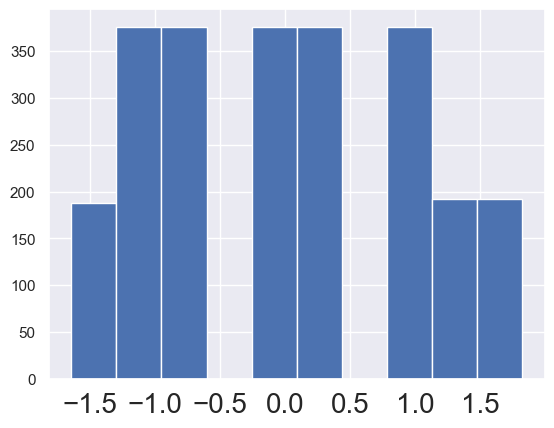

In [191]:
plt.hist(X_scal[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

In [192]:
# plt.hist(X[:,2], edgecolor='white')

# plt.xticks(fontsize=20)
# plt.show()

In [193]:
scaler = MinMaxScaler()
scaler.fit(X)
X_minmax = scaler.transform(X)

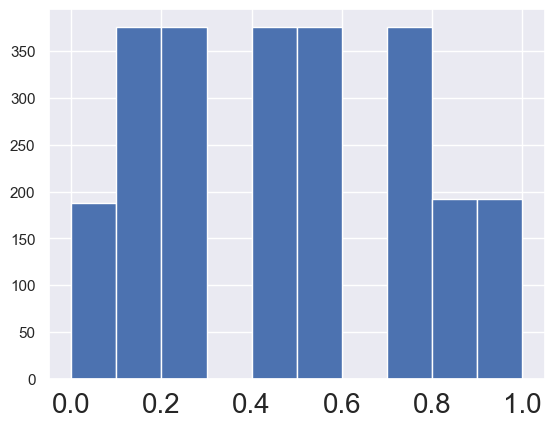

In [194]:
plt.hist(X_minmax[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

In [195]:
scaler = RobustScaler()
scaler.fit(X)
X_robust = scaler.transform(X)

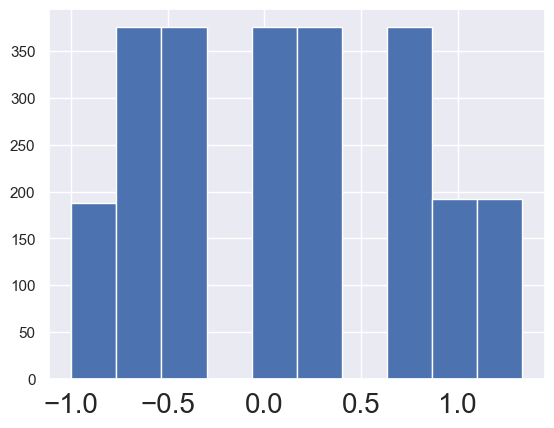

In [196]:
plt.hist(X_robust[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

In [197]:
kmeans = KMeans( n_clusters=3, n_init=10, max_iter=300 )
kmeans.fit(X_robust)

: 

: 

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X[: 9]

array([[ 0.00000000e+00,  3.73700000e+03,  5.00000000e+00,
        -7.55223450e+02,  0.00000000e+00,  1.38946530e-01,
         0.00000000e+00,  9.40606124e+00,  1.00000000e+00,
         1.79379000e+05,  1.00000000e+00,  3.35533140e-01],
       [ 0.00000000e+00,  3.90400000e+03,  4.00000000e+00,
        -7.13985600e+02,  0.00000000e+00,  2.63061520e-01,
         0.00000000e+00,  1.95641875e+01,  0.00000000e+00,
         1.87387000e+05,  1.00000000e+00,  3.52380420e-01],
       [ 0.00000000e+00,  4.67100000e+03,  2.00000000e+00,
        -7.26060360e+02,  1.00000000e+00,  1.66351320e-01,
         0.00000000e+00,  4.88124056e+00,  1.00000000e+00,
         2.24224000e+05,  1.00000000e+00,  3.52269680e-01],
       [ 0.00000000e+00,  3.63700000e+03,  7.00000000e+00,
        -8.42946350e+02,  0.00000000e+00,  2.40783700e-02,
         1.00000000e+00,  1.30402594e+01,  0.00000000e+00,
         1.74575000e+05,  1.00000000e+00,  3.60552070e-01],
       [ 1.00000000e+00,  4.40400000e+03,  2.0000000

In [ ]:
labels = kmeans.labels_

In [ ]:
# The lowest SSE value
kmeans.inertia_

9075.752180922158

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

8

In [ ]:
kmeans.labels_[:5]

array([1, 1, 0, 1, 0], dtype=int32)

In [ ]:
# sns.scatterplot(df["length_ms"], df["stft_mean"], s=40, edgecolor='black', c= kmeans.labels_)

: 

: 

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans1 = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans1.fit(X_robust)
    sse.append(kmeans1.inertia_)

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
centers

In [ ]:
# centers = scaler.inverse_transform(centers)

In [ ]:
# (1,3), (3,1), (3,7), *(3,9), (5,1), (1, 5), (5,9) clear cluster formation visible
# 0:"crimson", 1 :"tab:orange",  

In [ ]:
label_map = {0: "#008fd5", 1: "#fc4f30", 2: "darkgreen"}
label_color = [label_map[l] for l in labels]

In [ ]:
centers[:,1]

In [ ]:
X_robust[:,1]

In [ ]:
# plt.scatter( df["length_ms"], df["mfcc_std"], s=40, edgecolor='black', c= kmeans.labels_ )
plt.scatter( X_robust[:,1], X_robust[:,3], s=40, edgecolor='black', c= label_color)
plt.scatter( centers[:,1], centers[:,3], edgecolor='black', c='white',marker='o', s=500 )
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:


# plt.scatter( df["length_ms"], df["mfcc_std"], s=40, edgecolor='black', c= kmeans.labels_ )
plt.scatter( X_robust[:,1], X_robust[:,11], s=40, edgecolor='black', c= label_color)
plt.scatter( centers[:,1], centers[:,11], edgecolor='black', c='white',marker='o', s=500 )
# plt.ylim(-2, )
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
centers[:,7]

In [ ]:
# plt.scatter( df["length_ms"], df["mfcc_std"], s=40, edgecolor='black', c= kmeans.labels_ )
plt.scatter( X_robust[:,3], X_robust[:,7], s=40, edgecolor='black', c= label_color)
plt.scatter( centers[:,3], centers[:,7], edgecolor='black', c='white',marker='o', s=500 )
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
# This combination shows the best cluster formation (3,9)

# plt.scatter( df["length_ms"], df["mfcc_std"], s=40, edgecolor='black', c= kmeans.labels_ )
plt.scatter( X_robust[:,3], X_robust[:,9], s=40, edgecolor='black', c= label_color)
plt.scatter( centers[:,3], centers[:,9], edgecolor='black', c='white',marker='o', s=500 )
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
len(df.columns)

In [ ]:
len(X)

In [ ]:
len(df.columns)

In [ ]:
len(X[0])

In [ ]:
# for i in range(12):
#     for j in range(11):
#         plt.scatter( X_robust[:,i], X_robust[:,11], s=40, edgecolor='black', c= kmeans.labels_ )
#         plt.scatter( centers[:,i], centers[:,11], c='red', marker='*', s=200 )
#         plt.xticks(fontsize=20)
#         plt.yticks(fontsize=20)
#         print(i,j)
#         plt.show()

In [ ]:
# *(1,3), (1, 11), (3, 7), (3,9) clear cluster formation visible

In [ ]:
# Used to interpret well seperated clusters(centrids are seperate to each other)
plt.figure(figsize=(10, 6))

clust_name = ['A', 'B', "C"]
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0,len(clus_cols)), clus_cols, fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation = 90)

plt.legend(fontsize=15, loc='best')
plt.grid(axis='y')

In [ ]:
# the min value for a, b and c at vocal_channel is 0.4, 0.8
# respectively, meaning that clusters are not well seperated.

In [ ]:
a = list((np.unique(kmeans.labels_, return_counts=True)) )[1][0]
b = list((np.unique(kmeans.labels_, return_counts=True)) )[1][1]
c = list((np.unique(kmeans.labels_, return_counts=True)) )[1][2]

In [ ]:
print(a, b, c)

In [ ]:
# clus_cols = ["vocal_channel", "length_ms", "emotion", "mfcc_min", , "emotional_intensity", "max", 
#              "statement", "kur", "repetition", "frame_count", "sex", "stft_std"]

In [ ]:
df['kmeans_labels'] = kmeans.labels_

bar_pl = df['vocal_channel'].groupby(df['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

In [ ]:
# Showing the number of clusters:
#     Cluster 0: 1220, 1: 1232
print((np.unique(kmeans.labels_, return_counts=True)))
print(df["vocal_channel"].value_counts())

In [ ]:
(df["vocal_channel"].value_counts()[0] - a) + ((df["vocal_channel"].value_counts()[1] - b))

In [ ]:
578/len(df) *100

In [ ]:
(((df["vocal_channel"].value_counts()[0] - a)) / len(df)) * 100,  (((df["vocal_channel"].value_counts()[0] - b)) / len(df)) * 100

In [ ]:
y = df['vocal_channel']
# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
df['kmeans_labels'] = kmeans.labels_

bar_p2 = df["emotional_intensity"].groupby(df['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_p2.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

In [ ]:
 # Showing the number of clusters:
#     Cluster 0: 1220, 1: 1232
print((np.unique(kmeans.labels_, return_counts=True)))
print(df["emotional_intensity"].value_counts())

In [ ]:
list((np.unique(kmeans.labels_, return_counts=True)) )[1][0]

In [ ]:
(((df["emotional_intensity"].value_counts()[0] - a)) / len(df)) * 100,  (((df["emotional_intensity"].value_counts()[0] - b)) / len(df)) * 100

In [ ]:
y = df["emotional_intensity"]
# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
df['kmeans_labels'] = kmeans.labels_

bar_p3 = df["statement"].groupby(df['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_p3.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

In [ ]:
# Showing the number of clusters:
#     Cluster 0: 1220, 1: 1232
print((np.unique(kmeans.labels_, return_counts=True)))
print(df["statement"].value_counts())

In [ ]:
((len(df) - 32)/ len(df) ) * 100

In [ ]:
(((df["statement"].value_counts()[0] - a)) / len(df)) * 100,  (((df["statement"].value_counts()[0] - b)) / len(df)) * 100

In [ ]:
y = df["statement"]
# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
df['kmeans_labels'] = kmeans.labels_

bar_p4 = df["repetition"].groupby(df['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_p4.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

In [ ]:
# Showing the number of clusters:
#     Cluster 0: 1220, 1: 1232
print((np.unique(kmeans.labels_, return_counts=True)))
print(df["repetition"].value_counts())

In [ ]:
(((df["repetition"].value_counts()[0] - a)) / len(df)) * 100,  (((df["repetition"].value_counts()[0] - b)) / len(df)) * 100

In [ ]:
y = df['repetition']
# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
y = df['statement']
# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
df['kmeans_labels'] = kmeans.labels_

bar_p5 = df["sex"].groupby(df['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_p5.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

In [ ]:
# Showing the number of clusters:
#     Cluster 0: 1220, 1: 1232
print(np.unique(kmeans.labels_, return_counts=True))
print(df["sex"].value_counts())

In [ ]:
(((df["sex"].value_counts()[0] - a)) / len(df)) * 100,  (((df["sex"].value_counts()[0] - b)) / len(df)) * 100

In [ ]:
y = df["sex"]
# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
df['kmeans_labels'] = kmeans.labels_

bar_p6 = df["emotion"].groupby(df['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_p6.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

In [ ]:
# Showing the number of clusters:
#     Cluster 0: 1220, 1: 12329
print(np.unique(kmeans.labels_, return_counts=True))
print(df["emotion"].value_counts())

In [ ]:
(((df["emotion"].value_counts()[0] - a)) / len(df)) * 100,  (((df["emotion"].value_counts()[0] - b)) / len(df)) * 100

In [ ]:
y = df["emotion"]
# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
# categorical_cols

In [ ]:
# for x in categorical_cols:
#     accuracy = ( (len(df) - ((df[x].value_counts()[0] - a) + (df[x].value_counts()[0] - a))) / len(df) ) * 100
#     print("Accuracy of KMeans for {} : {}".format(x, accuracy))

In [ ]:
# # By our analysis, we found that the clusters found by kmeans clustering were 
# very close with repetition and statement with an error of 0.65%, which is very good

In [ ]:
# the clusters are well seperate at index 1, 3, 5 and 7 whoch could be easily obseved in the parallel coordinates plot above which was also visualized in scatterplots

In [ ]:
# Showing the number of clusters:
#     Cluster 0: 1220, 1: 1232
np.unique(kmeans.labels_, return_counts=True)

In [ ]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_robust, kmeans.labels_))

In [ ]:
In [17]: # A list holds the silhouette coefficients for each k
silhouette_coefficients = []

sse_list1 = []
    # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans1 = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans1.fit(X_robust)
    score = silhouette_score(X_robust, kmeans1.labels_)
    silhouette_coefficients.append(score)
    sse_list1.append( kmeans1.inertia_ )


In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
plt.plot(range(2, len(sse_list1)+2), sse_list1, marker='*')
plt.ylabel('SSE')
plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
sil_visualizer = SilhouetteVisualizer(kmeans)
sil_visualizer.fit(X_robust)    
sil_visualizer.show()

In [ ]:
elb_visualizer = KElbowVisualizer(kmeans, k=(1,11))
elb_visualizer.fit(X_robust)    
elb_visualizer.show() 

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [ ]:
kl.elbow

In [ ]:
# #  Plot the data and cluster silhouette comparison
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
# fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
# fte_colors = {
# 0: "#008fd5",
# 1: "#fc4f30",
# 2: "yellow"
# }
# # The k-means plot
# km_colors = [fte_colors[label] for label in kmeans.labels_]
# ax1.scatter(X_robust[:,3], X_robust[:,7], c=km_colors)
# ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})
   
        
# # The dbscan plot
# db_colors = [fte_colors[label] for label in dbscan.labels_]
# ax2.scatter(X_robust[:,3], X_robust[:,7], c=db_colors)
# ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})
# plt.show()

In [ ]:
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [ ]:
# # Comparing KMeans and DBSCAN
# # Instantiate k-means and dbscan algorithms
# kmeans = KMeans(n_clusters=2)
# dbscan = DBSCAN(eps=0.3)

# # Fit the algorithms to the features
# kmeans.fit(X_robust)
# dbscan.fit(X_robust)
   
# # Compute the silhouette scores for each algorithm
# kmeans_silhouette = silhouette_score(X_robust, kmeans.labels_).round(2)
# dbscan_silhouette = silhouette_score(X_robust, dbscan.labels_).round (2)

In [ ]:
# DBSCAN Clustering
dbscan = DBSCAN( eps=1.25, min_samples=3)
dbscan.fit(X_robust)

In [ ]:
true_labels = df["repetition"]

In [ ]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [ ]:
ari_kmeans

In [ ]:
ari_dbscan

In [ ]:
dlabels = dbscan.labels_

In [ ]:
plt.scatter( X_robust[:,3], X_robust[:,9], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
plt.scatter( X_robust[:,3], X_robust[:,7 ], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
dist = pdist(X_robust, 'euclidean')
dist = squareform(dist)

k=3
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

In [ ]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 5th neighbor')
         
plt.show()

In [ ]:
data_dist = pdist(X_robust, metric='euclidean')
data_link = linkage(data_dist, method='complete')

res = dendrogram(data_link, truncate_mode='lastp')

In [ ]:
data_dist = pdist(X_robust, metric='euclidean')
data_link = linkage(data_dist, method='single')

res = dendrogram(data_link, truncate_mode='lastp')

In [ ]:
hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
hier.fit(X_robust)

In [ ]:
hier.labels_

In [ ]:
# Inorder to use categorical attributes also for clustering, 
# we use dist instead of scaled x_robust, by changing distance metric affinity
hier1 = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='single')
hier1.fit( dist )

In [ ]:
hier.labels_

In [ ]:
# dist is the distance matrix

In [ ]:
# df.head()

In [ ]:
# categorical_cols

In [ ]:
# df11 = df[['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition','sex','length_ms','intensity']]
# df11.tail(100)

In [ ]:
# df[["emotion", "emotional_intensity", "statement", "repetition"]]

In [ ]:
# X = df.values
# # 
# df.head()

In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.cluster import KMeans, DBSCAN

In [ ]:
# scaler = StandardScaler()
# scaler.fit(X)
# X_scal = scaler.transform(X)

In [ ]:
# # classes=df['IsBadBuy']
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

In [ ]:
# i = 2
# sns.histplot(X[:,i])
# plt.title(df11.columns[i])
# plt.xlabel("Values")
# plt.show()

In [ ]:
# i = 2
# sns.histplot(X_scal[:,i])
# plt.title(df.columns[i])
# plt.xlabel("Standardized values (zscore)")
# plt.show()

In [ ]:
# scaler = MinMaxScaler()
# X_minmax = scaler.fit_transform(X)

# i = 2
# sns.histplot(X_minmax[:,i])
# plt.title(df.columns[i])
# plt.xlabel("Normalized values (minmax)")
# plt.show()

In [ ]:
# kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
# kmeans.fit(X_minmax)

In [ ]:
# sse_list = list()
# silhouette_list = list()
# max_k = 20
# for k in range(2, max_k + 1):
#     kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
#     kmeans.fit(X_scal)
#     sse_list.append(kmeans.inertia_)
#     silhouette_list.append(silhouette_score(X_scal,kmeans.labels_))

In [ ]:
# _, ax = plt.subplots(1)
# ax.plot(range(2, len(sse_list) + 2), sse_list)
# plt.ylabel('SSE', fontsize=10)
# plt.xlabel('K', fontsize=10)
# plt.tick_params(axis='both', which='major', labelsize=10)
# ax.set_ylim(ymin=300,ymax=1100)
# plt.show()

In [ ]:
# sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o')
# plt.ylabel('SSE')
# plt.xlabel('k')
# plt.show()

In [ ]:
# plt.plot(range(2, len(silhouette_list) + 2), silhouette_list)
# plt.ylabel('Silhouettes', fontsize=10)
# plt.xlabel('K', fontsize=10)
# plt.tick_params(axis='both', which='major', labelsize=10)
# # plt.grid()
# ax.set_xlim(xmin=0,xmax=5)
# plt.show()

In [ ]:
# kmeans = KMeans(init='k-means++', n_clusters=15, n_init=10, max_iter=100)
# kmeans.fit(X)
# hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
# print('labels', dict(zip(bins, hist)))
# print('sse', kmeans.inertia_)
# print('silhouette', silhouette_score(train_data, kmeans.labels_))

In [ ]:
# pip install helper 

In [ ]:
# clus_cols = ["vocal_channel", "length_ms", "emotion", "mfcc_min", 
#              "emotional_intensity", "max", "statement", "kur", "repetition", 
#              "frame_count", "sex", "stft_std", ]

In [ ]:
# categorical_cols

In [ ]:
# # 10. Declare feature vector and target variable
# X = df[clus_cols]
# y = df['repetition']

In [ ]:
# # View the summary of X
# X.info()

In [ ]:
# cols = X.columns

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# ms = MinMaxScaler()

# X = ms.fit_transform(X)

In [ ]:
# X = pd.DataFrame(X, columns=[cols])


In [ ]:
# X.head()

In [ ]:
# # K-Means model with three clusters
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=6, random_state=0) 

# kmeans.fit(X)

In [ ]:
# kmeans.cluster_centers_

In [ ]:
# kmeans.inertia_

In [ ]:
# labels = kmeans.labels_

# # check how many of the samples were correctly labeled
# correct_labels = sum(y == labels)

# print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

In [ ]:
# print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
# We have achieved a weak classification accuracy of 15% by our unsupervised model.

In [ ]:
# df.columns

In [ ]:
# # Use elbow method to find optimal number of clusters
# sse_list = []
# for k in range(2, 51):
#     kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
#     kmeans.fit(train_data)
#     sse_list.append(kmeans.inertia_)

In [ ]:
# from sklearn.cluster import KMeans
# sse_list = []
# for k in range(1, 30):
#     kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#     kmeans.fit(X)
#     sse_list.append(kmeans.inertia_)
# plt.plot(range(1, 30), sse_list)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('CS')
# plt.show()

In [ ]:
# sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o')
# plt.ylabel('SSE')
# plt.xlabel('k')
# plt.show()

In [ ]:
# sse_list

In [ ]:
# ! pip install yellowbrick

In [ ]:
# from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
# X.drop(["repetition"], axis=1)

In [ ]:
# model = KMeans(random_state=42)

# elb_visualizer = KElbowVisualizer(model, k=(2,11))
# elb_visualizer.fit(X)    
# elb_visualizer.show() 

In [ ]:
# model_4clust = KMeans(n_clusters = 2, random_state=42)

# sil_visualizer = SilhouetteVisualizer(model_4clust)
# sil_visualizer.fit(X)    
# sil_visualizer.show()